<a href="https://colab.research.google.com/github/spacemaninSeoul/road_to_NLPmaster/blob/main/machine_learning_summary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

머신 러닝은 영상 처리, 번역기, 음성 인식, 스팸 메일 탐지 등 굉장히 다양한 분야에서 응용되고 있습니다. 특히 머신 러닝의 한 갈래인 딥 러닝은 자연어 처리 엔지니어에게 필수 역량이 되어가고 있습입니다. 이번 챕터에서는 머신 러닝의 개념과 선형 회귀, 로지스틱 회귀, 소프트맥스 회귀와 같은 기본적인 모델을 이해합니다. 그리고 이러한 이해를 바탕으로 다음 딥 러닝 챕터에서 기본적인 모델로부터 딥 러닝 모델로 개념을 확장해보겠습니다.



# 1. 머신 러닝이란(What is Machine Learning?)

딥 러닝을 포함하고 있는 개념인 머신 러닝(Machine Learning)의 개념에 대해서 학습합니다.



## 1) 머신 러닝이 아닌 접근 방법의 한계

머신 러닝이 아닌 기존의 프로그래밍 작성 방식을 통해서는 해결하기 어려운 문제 예시를 하나 들어보겠습니다.



```
예시 : 주어진 사진으로부터 고양이 사진인지 강아지 사진인지 판별하는 일.
```
위 문제는 실제 2017년에 있었던 DGIST의 딥 러닝 경진대회의 문제입니다. 사진을 보고 고양이 사진인지, 강아지 사진인지 판단하는 건 사람에게는 너무나 쉬운 일입니다. 그런데 이 문제를 풀 수 있는 프로그램을 작성하는 것은 상당히 난해한 수준입니다. 입력된 이미지로부터 강아지와 고양이를 구분할 수 있는 코드를 어떻게 작성할 수 있을까요?





```
def prediction(이미지 as input):
    어떻게 코딩해야하지?
    return 결과
```

사진이란 건 사진을 보는 각도, 조명, 타겟의 변형(고양이의 자세)에 따라서 너무나 천차만별이라 사진으로부터 공통된 명확한 특징을 잡아내는 것이 쉽지 않습니다. 사실, 결론을 미리 말씀드리면 해당 프로그램은 숫자를 정렬하는 것과 같은 명확한 알고리즘이 애초에 존재하지 않습니다.


이러한 이미지 인식 분야에서 규칙을 정의하고 특징을 잡아내기 위한 많은 시도들이 있었습니다. 이미지 내의 경계선과 같은 것들을 찾아내서 알고리즘화 하려고 시도하고, 다른 사진 이미지가 들어오면 전반적인 상태를 비교하여 분류하려고 한 것입니다. 하지만 그러한 시도들은 결국 특징을 잡아내는 것에 한계가 있을 수밖에 없었습니다. 결국 요즘에 이르러서는 사진으로부터 대상을 찾아내는 일은 사람이 규칙을 정의하는 것이 아니라 머신 러닝으로 문제를 해결하고 있습니다.






## 2) 머신 러닝 방식

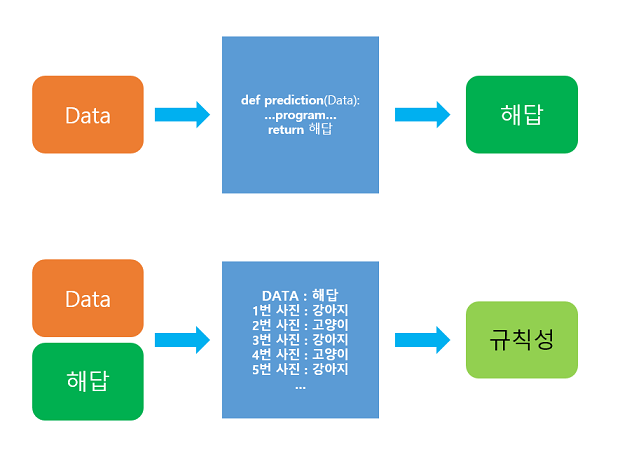

머신 러닝이 위에서 언급한 예시 문제를 해결할 수 있는 이유는 해결을 위한 접근 방식이 기존의 프로그래밍 방식과는 다르기 때문입니다. 위 이미지에서 위쪽은 기존의 프로그래밍의 접근 방식, 아래쪽은 머신 러닝의 접근 방식을 보여줍니다. 머신 러닝은 데이터가 주어지면, 기계가 스스로 데이터로부터 규칙성을 찾는 것에 집중합니다. 주어진 데이터로부터 규칙성을 찾는 과정을 우리는 훈련(training) 또는 학습(learning)이라고 합니다.

일단 규칙성을 발견하고나면, 그 후에 들어오는 새로운 데이터에 대해서 발견한 규칙성을 기준으로 정답을 찾아내는데 이는 기존의 프로그래밍 방식으로 접근하기 어려웠던 문제의 해결책이 되기도 합니다. 이미지를 예시로 들었지만 자연어 처리도 이미지 처리 만큼이나 어려운 문제들이 많습니다. 최근에는 머신 러닝의 한 갈래인 딥 러닝이 자연어 처리에서 굉장히 뛰어난 성능을 보여주고 있습니다. 단적으로, 구글 번역기와 같은 기계 번역기가 그러한데, 이러한 번역기는 사람이 직접 규칙을 정의해서 만드는 것보다 딥 러닝으로 모델이 스스로 규칙을 찾아내도록 구현하는 것이 훨씬 더 좋은 성능을 얻을 수 있습니다.

-----
이해를 위해서 해당 링크도 참조로 보면 좋습니다.
https://wikidocs.net/21748



# 2. 머신 러닝 훑어보기

머신 러닝의 특징을 이해하고, 주요 용어에 미리 친숙해져봅시다.



## 1) 머신 러닝 모델의 평가

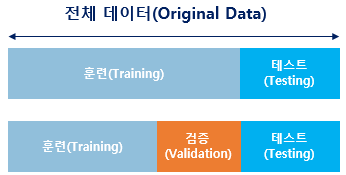

머신 러닝을 위한 데이터를 준비했다면 기계를 학습하기 전 해당 데이터를 훈련용, 검증용, 테스트용 이렇게 세 가지로 분리하는 것이 일반적입니다. 훈련 데이터는 머신 러닝 모델을 학습하는 용도입니다. 테스트 데이터는 학습한 머신 러닝 모델의 성능을 평가하기 위한 용도입니다. 그렇다면 검증용 데이터의 용도는 무엇일까요?

검증용 데이터는 모델의 성능을 평가하기 위한 용도가 아니라 모델의 성능을 조정하기 위한 용도입니다. 더 정확히는 모델이 훈련 데이터에 **과적합(overfitting)** 이 되고 있는지 판단하거나 하이퍼파라미터의 조정을 위한 용도입니다. 하이퍼파라미터와 매개변수라는 용어를 정리해둡시다.

 - **하이퍼파라미터(초매개변수)** : 모델의 성능에 영향을 주는 사람이 값을 지정하는 변수.
 - **매개변수** : 가중치와 편향. 학습을 하는 동안 값이 계속해서 변하는 수.

아직 이 장에서는 검증용 데이터와 하이퍼파라미터의 개념이 어떤 의미인지 와닿지 않아도 괜찮습니다. 이 개념은 앞으로 지속적으로 언급하게 될 것입니다. 이 두 변수의 가장 큰 차이는 **하이퍼파라미터는 보통 사용자가 직접 정해줄 수 있는 변수**라는 점입니다. 뒤의 선형 회귀에서 배우게 되는 **경사 하강법에서 학습률(learning rate)이나, 딥 러닝에서 뉴런의 수나 층의 수와 같은 것들**이 대표적인 하이퍼파라미터입니다.

반면, **가중치와 편향과 같은 매개변수는 사용자가 결정해주는 값이 아니라 모델이 학습하는 과정에서 얻어지는 값**입니다. 훈련용 데이터로 훈련을 모두 시킨 모델은 검증용 데이터를 사용하여 정확도를 검증하며 하이퍼파라미터를 튜닝(tuning) 합니다. 검증용 데이터에 대해서 높은 정확도를 얻도록 하이퍼파라미터의 값을 바꿔보는 것입니다. 이렇게 튜닝하는 과정에서 모델은 검증용 데이터의 정확도를 높이는 방향으로 점차적으로 수정됩니다.

튜닝 과정을 모두 끝내고 모델의 최종 평가를 하고자 한다면, 이제 검증용 데이터로 모델을 평가하는 것은 적합하지 않습니다. 모델은 검증용 데이터의 정확도를 높이기 위해서 수정되어져 온 모델이기 때문입니다. 모델에 대한 평가는 이제 모델이 한 번도 보지 못한 데이터인 테스트 데이터의 몫입니다. 수학능력시험을 준비하는 수험생으로 비유하자면 훈련 데이터는 실제 공부를 위한 문제지, 검증 데이터는 모의고사, 테스트 데이터는 실력을 최종적으로 평가하는 수능 시험이라고 볼 수 있습니다.




## 2) 분류(Classification)와 회귀(Regression)

전부는 아니지만 머신 러닝의 많은 문제는 분류 또는 회귀 문제에 속합니다. 이번 챕터에서는 머신 러닝 기법 중 선형 회귀(Lineare Regression)과 로지스틱 회귀(Logistic Rgression)를 다루는데 선형 회귀는 대표적인 회귀 문제에 속하고, 로지스틱 회귀는 (이름은 회귀이지만) 대표적인 분류 문제에 속합니다.

분류는 또한 이진 분류(Binary Classification)과 다중 클래스 분류(Multi-Class Classification)로 나뉩니다. 엄밀히는 다중 레이블 분류(Multi-lable Classification)라는 또 다른 문제가 존재하지만, 이 책에서는 이진 분류와 다중 클래스 분류만을 다룹니다.




### (1) 이진 분류 문제(Binary Classification)

**이진 분류는 주어진 입력에 대해서 두 개의 선택지 중 하나의 답을 선택해야 하는 경우**를 말합니다. 종합 시험 성적표를 보고 최종적으로 합격, 불합격인지 판단하는 문제, 메일을 보고나서 정상 메일, 스팸 메일인지를 판단하는 문제 등이 이에 속합니다.



### (2) 다중 클래스 분류(Multi-class Classification)

**다중 클래스 분류는 주어진 입력에 대해서 세 개 이상의 선택지 중에서 답을 선택해야 하는 경우**를 말합니다. 예를 들어 서점 직원이 일을 하는데 과학, 영어, IT, 학습지, 만화라는 레이블이 붙어있는 5개의 책장이 있다고 합시다. 새 책이 입고되면, 이 책은 다섯 개의 책장 중에서 분야에 맞는 적절한 책장에 책을 넣어야 합니다. 이 경우는 현실에서의 다중 클래스 분류 문제라고 할 수 있겠습니다.

### (3) 회귀 문제(Regression)

회귀 문제는 분류 문제처럼 둘 중 하나를 선택해야 한다거나, 책이 입고되었을 때 5개의 책장 중 하나의 책장을 골라야하는 경우처럼 정답이 몇 개의 정해진 선택지 중에서 정해져 있는 경우가 아니라 **어떠한 연속적인 값의 범위 내에서 예측값이 나오는 경우**를 말합니다.

예를 들어서 역과의 거리, 인구 밀도, 방의 개수 등을 입력하면 부동산 가격을 예측하는 머신 러닝 모델이 있다고 해봅시다. 머신 러닝 모델이 부동산 가격을 7억 8,456만 3,450원으로 예측하는 경우도 있을 것이고, 8억 1257만 300원으로 예측하는 경우도 있을 수 있습니다. 특정 값의 범위 내에서는 어떤 숫자도 나올 수 있습니다. 기존의 분류 문제와 같이 분리된(비연속적인) 답이 결과가 아니라 **연속된 값을 결과로 가지는** 이러한 문제를 회귀 문제라고 부릅니다. 회귀 문제의 예시로 시계열 데이터(Time Series Data)를 이용한 주가 예측, 생산량 예측, 지수 예측 등이 있습니다.



## 3) 지도 학습과 비지도 학습

머신 러닝은 크게 지도 학습, 비지도 학습, 강화 학습으로 나눕니다. 강화 학습은 이 책의 범위를 벗어나므로 설명하지 않습니다. 그리고 큰 갈래로서는 자주 언급 되지는 않지만 딥 러닝 자연어 처리에서 중요한 학습 방법 중 하나인 자기지도 학습(Self-Supervised Learning, SSL)에 대해서도 언급해보겠습니다.

### (1) 지도 학습(Supervised Learning)

**지도 학습이란 레이블(Label)이라는 정답과 함께 학습하는 것**을 말합니다. 자연어 처리는 대부분 지도 학습에 속합니다. 앞으로 우리가 풀게 될 자연어 처리의 많은 문제들은 레이블이 존재하는 경우가 많기 때문입니다. 이는 앞서 2챕터의 데이터의 분리를 설명하며 상세히 설명한 바 있습니다. 레이블이라는 말 외에도 y, 실제값 등으로 부르기도 하는데 이 책에서는 이 용어들을 상황에 따라서 바꿔서 사용합니다. 기계는 예측값과 실제값의 차이인 오차를 줄이는 방식으로 학습을 하게 되는데 예측값은 ^y과 같이 표현하기도 합니다.




### (2) 비지도 학습(Unsupervised Learning)

**비지도 학습은 데이터에 별도의 레이블이 없이 학습하는 것**을 말합니다. 예를 들어 텍스트 처리 분야의 토픽 모델링 알고리즘인 LSA나 LDA는 비지도 학습에 속합니다. LSA와 LDA는 온라인 웹 사이트 위키독스의 e-book( https://wikidocs.net/30707 )에서 볼 수 있습니다.

### (3) 자기지도 학습(Self-Supervised Learning, SSL)

**레이블이 없는 데이터가 주어지면, 모델이 학습을 위해서 스스로 데이터로부터 레이블을 만들어서 학습하는 경우를 자기지도 학습**이라고 합니다. 대표적인 예시로는 Word2Vec과 같은 워드 임베딩 알고리즘이나, BERT와 같은 언어 모델의 학습 방법을 들 수 있습니다. 이들이 어떻게 레이블을 만들어 학습하는지에 대한 설명은 Word2Vec과 BERT를 설명하는 페이지를 참고바랍니다.

## 4) 샘플(Sample)과 특성(Feature)

많은 머신 러닝 문제가 1개 이상의 독립 변수 x를 가지고 종속 변수 y를 예측하는 문제입니다. 머신 러닝 모델 중 특히 인공 신경망은 독립 변수, 종속 변수, 가중치, 편향 등을 행렬 연산을 통해 연산하는 경우가 많습니다. 앞으로 인공 신경망을 배우게되면 훈련 데이터를 행렬로 표현하는 경우를 많이 보게 됩니다. 독립 변수 x의 행렬을 X라고 하였을 때, 독립 변수의 개수가 n개이고 데이터의 개수가 m인 행렬 X는 다음과 같습니다.

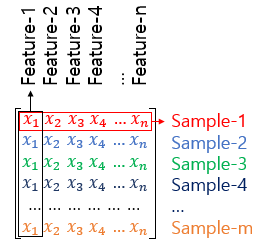

이때 머신 러닝에서는 하나의 데이터. 행렬 관점에서는 하나의 행을 샘플(Sample)이라고 부릅니다. (데이터베이스에서 레코드라고 부르는 단위입니다.) 그리고 종속 변수 y를 예측하기 위한 각각의 독립 변수 x를 특성(Feature)이라고 부릅니다. 행렬 관점에서는 각 열에 해당됩니다.



## 5) 혼동 행렬(Confusion Matrix)

머신 러닝에서는 맞춘 문제수를 전체 문제수로 나눈 값을 정확도(Accuracy)라고 합니다. 하지만 정확도는 맞춘 결과와 틀린 결과에 대한 세부적인 내용을 알려주지는 않습니다. 이를 위해서 사용하는 것이 혼동 행렬(Confusion Matrix)입니다. 예를 들어 참(True)와 거짓(False) 둘 중 하나를 예측하는 문제였다고 가정해봅시다. 아래의 혼동 행렬에서 각 열은 예측값을 나타내며, 각 행은 실제값을 나타냅니다.

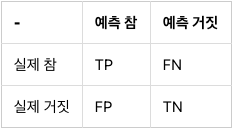

머신 러닝에서는 다음과 같은 네 가지 케이스에 대해서 각각 TP, FP, FN, TN을 정의합니다.

 - True Positive(TP) : 실제 True인 정답을 True라고 예측 (정답)
 - False Positive(FP) : 실제 False인 정답을 True라고 예측 (오답)
 - False Negative(FN) : 실제 True인 정답을 False라고 예측 (오답)
 - True Negative(TN) : 실제 False인 정답을 False라고 예측 (정답)

이 개념을 사용하면 정밀도(Precision)과 재현율(Recall)이 됩니다.

### (1) 정밀도(Precision)

**정밀도란 모델이 True라고 분류한 것 중에서 실제 True인 것**의 비율입니다.

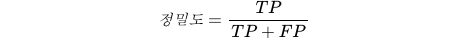

### (2) 재현율(Recall)

**재현율이란 실제 True인 것 중에서 모델이 True라고 예측한 것**의 비율입니다.

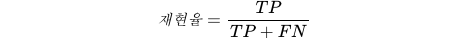

Precision이나 Recall은 모두 실제 True인 정답을 모델이 True라고 예측한 경우. 즉, TP에 관심이 있습니다. 두 식 모두 분자가 TP임에 주목합시다.



### (3) 정확도(Accuracy)

정확도(Accuracy)는 우리가 일반적으로 실생활에서도 가장 많이 사용하는 지표입니다. **전체 예측한 데이터 중에서 정답을 맞춘 것에 대한 비율**입니다. TP, FP, FN, TN을 가지고 수식을 설명하면 다음과 같습니다.

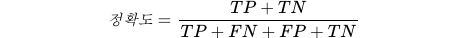

그런데 Accuracy로 성능을 예측하는 것이 적절하지 않은 때가 있습니다. 비가 오는 날을 예측하는 모델을 만들었다고 했을 때, 200일 동안 총 6일만 비가 왔다고 해봅시다. 그런데 이 모델은 200일 내내 날씨가 맑았다고 예측했습니다. 이 모델은 200번 중 총 6회 틀렸습니다. 194/200=0.97이므로 정확도는 97%입니다. 하지만 정작 비가 온 날은 하나도 못 맞춘 셈입니다.

또 다른 예를 들어봅시다. 스팸 메일을 분류하는 스팸 메일 분류기를 만들었습니다. 메일 100개 중 스팸 메일은 5개였습니다. 스팸 메일 분류기는 모두 정상 메일이라고 탐지했습니다. 정확도는 95%입니다. 그런데 정작 스팸 메일은 하나도 못 찾아낸 셈입니다.

이렇게 **실질적으로 더 중요한 경우에 대한 데이터가 전체 데이터에서 너무 적은 비율을 차지한다면 정확도는 좋은 측정 지표가 될 수 없습니다.** 이런 경우에는 F1-Score를 사용하며, 이에 대해서는 개체명 인식 챕터에서 설명하겠습니다.




## 6) 과적합(Overfitting)과 과소 적합(Underfitting)

학생의 입장이 되어 하나의 문제지를 과하도록 많이 풀어서 문제 번호만 봐도 정답을 맞출 수 있게 되었다고 가정합시다. 그런데 너무 오랜 시간 하나의 문제지만 반복해서 푼 나머지 다른 문제를 풀거나 시험을 봤을 때 점수가 안 좋다면 그게 의미가 있을까요?

머신 러닝에서 **과적합(Overfitting) 이란 위의 비유처럼 훈련 데이터를 과하게 학습한 경우**를 말합니다. 머신 러닝 모델이 학습에 사용하는 훈련 데이터는 실제로 앞으로 기계가 풀어야 할 현실의 수많은 문제에 비하면 극히 일부에 불과한 데이터입니다. **기계가 훈련 데이터에 대해서만 과하게 학습하면 성능 측정을 위한 데이터인 테스트 데이터나 실제 서비스에서는 정확도가 좋지 않은 현상**이 발생합니다.

과적합 상황에서는 훈련 데이터에 대해서는 오차가 낮지만, 테스트 데이터에 대해서는 오차가 커집니다. 아래의 그래프는 과적합 상황에서 발생할 수 있는 훈련 데이터에 대한 훈련 횟수에 따른 훈련 데이터의 오차와 테스트 데이터의 오차(또는 손실이라고도 부릅니다.)의 변화를 보여줍니다.

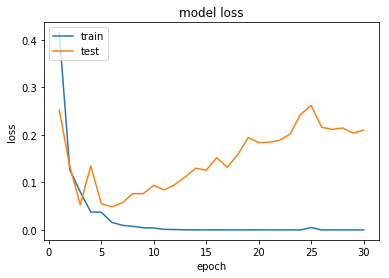

위 그래프는 뒤의 RNN을 이용한 텍스트 분류 챕터의 스팸 메일 분류하기 실습에서 훈련 데이터에 대한 훈련 횟수를 30 에포크로 주어서 의도적으로 과적합을 발생시킨 그래프입니다. y축은 오차(loss), X축의 에포크(epoch)는 전체 훈련 데이터에 대한 훈련 횟수를 의미하며, 사람으로 비유하면 동일한 문제지(훈련 데이터)를 반복해서 푼 횟수입니다. 에포크가 지나치게 크면 훈련 데이터에 과적합이 발생합니다.

스팸 메일 분류하기 실습은 에포크가 3~4에서 테스트 데이터에 대한 정확도가 가장 높고, 에포크가 그 이상을 넘어가면 과적합이 발생합니다. 위의 그래프는 에포크가 증가할수록 테스트 데이터에 대한 오차가 점차 증가하는 양상을 보여줍니다. 과적합은 다르게 설명하면 훈련 데이터에 대한 정확도는 높지만, 테스트 데이터는 정확도가 낮은 상황이라고 말할 수도 있습니다. 이런 상황을 방지하기 위해서는 테스트 데이터의 오차가 증가하기 전이나, 정확도가 감소하기 전에 훈련을 멈추는 것이 바람직합니다.






반면, **테스트 데이터의 성능이 올라갈 여지가 있음에도 훈련을 덜 한 상태를 과소적합(Underfitting)** 이라고 합니다. 과소 적합은 훈련 자체가 부족한 상태이므로 훈련 횟수인 에포크가 지나치게 적으면 발생할 수 있습니다. 과대 적합과는 달리 과소 적합은 훈련 자체를 너무 적게한 상태이므로 훈련 데이터에 대해서도 정확도가 낮다는 특징이 있습니다.

이러한 두 가지 현상을 과적합과 과소 적합이라고 부르는 이유는 머신 러닝에서 학습 또는 훈련이라고 하는 과정을 적합(fitting)이라고도 부르기 때문입니다. 모델이 주어진 데이터에 대해서 적합해져가는 과정이기 때문입니다. 이러한 이유로 케라스에서는 기계를 학습시킬 때 fit()을 호출합니다. 바로 뒤의 선형 회귀 실습에서 보게 될 것입니다.

딥 러닝을 할 때는 과적합을 막을 수 있는 드롭 아웃(Dropout), 조기 종료(Early Stopping)과 같은 몇 가지 방법이 존재하는데 이는 뒤의 딥 러닝 챕터에서 소개합니다.

과적합과 과소 적합을 설명하면서 테스트 데이터를 사용하여 판단할 수 있다고 설명하였지만, 더 정확히 설명하면 현업에서는 테스트 데이터를 두 가지 용도로 분리하여 사용하는 것이 더 바람직합니다. 각각의 용도는 과적합 모니터링과 하이퍼파라미터 튜닝을 위한 테스트 데이터와 오직 성능 평가만을 위한 테스트 데이터입니다. 그리고 전자의 테스트 데이터를 검증 데이터라고 부릅니다. 앞에서 데이터를 훈련 데이터, 검증 데이터, 테스트 데이터 세 가지로 나누어야 한다고 언급했던 것을 기억하시나요? 과적합 방지를 고려한 일반적인 딥 러닝 모델의 학습 과정은 다음과 같습니다.

 - Step 1. 주어진 데이터를 훈련 데이터, 검증 데이터, 테스트 데이터로 나눈다. 가령, 6:2:2 비율로 나눌 수 있다.
 - Step 2. 훈련 데이터로 모델을 학습한다. (에포크 +1)
 - Step 3. 검증 데이터로 모델을 평가하여 검증 데이터에 대한 정확도와 오차(loss)를 계산한다.
 - Step 4. 검증 데이터의 오차가 증가하였다면 과적합 징후이므로 학습 종료 후 Step 5로 이동, 아니라면 Step 2.로 재이동한다.
 - Step 5. 모델의 학습이 종료되었으니 테스트 데이터로 모델을 평가한다.
 
---
자기 지도 학습 : https://amitness.com/2020/05/self-supervised-learning-nlp/





# 3. 선형 회귀(Linear Regression)

딥 러닝을 이해하기 위해서는 선형 회귀(Linear Regression)와 로지스틱 회귀(Logsitic Regression)를 이해할 필요가 있습니다. 이번 챕터에서는 머신 러닝에서 쓰이는 용어인 가설(Hypothesis), 손실 함수(Loss Function) 그리고 경사 하강법(Gradient Descent)에 대한 개념과 선형 회귀에 대해서 이해합니다.

## 1) 선형 회귀(Linear Regression)


시험 공부하는 시간을 늘리면 늘릴 수록 성적이 잘 나옵니다. 하루에 걷는 횟수를 늘릴 수록, 몸무게는 줄어듭니다. 집의 평수가 클수록, 집의 매매 가격은 비싼 경향이 있습니다. 이는 수학적으로 생각해보면 어떤 요인의 수치에 따라서 특정 요인의 수치가 영향을 받고있다고 말할 수 있습니다. 조금 더 수학적인 표현을 써보면 어떤 변수의 값에 따라서 특정 변수의 값이 영향을 받고 있다고 볼 수 있습니다. 다른 변수의 값을 변하게하는 변수를 x, 변수 x에 의해서 값이 종속적으로 변하는 변수 y라고 해봅시다.

이때 **변수 x의 값은 독립적으로 변할 수 있는 것에 반해, y값은 계속해서 x의 값에 의해서, 종속적으로 결정되므로 x를 독립 변수, y를 종속 변수**라고도 합니다. **선형 회귀는 한 개 이상의 독립 변수 x와 y의 선형 관계를 모델링합니다. 만약, 독립 변수 x가 1개라면 단순 선형 회귀**라고 합니다.



### (1) 단순 선형 회귀 분석(Simple Linear Regression Analysis)



```
y = wx + b
```
위의 수식은 단순 선형 회귀의 수식을 보여줍니다. 여기서 **독립 변수 x와 곱해지는 값 w를 머신 러닝에서는 가중치(weight), 별도로 더해지는 값 b를 편향(bias)**이라고 합니다. 직선의 방정식에서는 각각 직선의 기울기와 절편을 의미합니다. w와 b가 없이 y와 x란 수식은 는 와 같다는 하나의 식밖에 표현하지 못합니다. 그래프 상으로 말하면 하나의 직선밖에 표현하지 못합니다.

```
y = x

```

다시 말해 w와 b의 값에 따라서 x와 y가 표현하는 직선은 무궁무진해집니다.


### (2) 다중 선형 회귀 분석(Multiple Linear Regression Analysis)

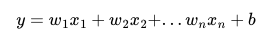

집의 매매 가격은 단순히 집의 평수가 크다고 결정되는 게 아니라 집의 층의 수, 방의 개수, 지하철 역과의 거리와도 영향이 있습니다. 이러한 다수의 요소를 가지고 집의 매매 가격을 예측해보고 싶습니다. **y는 여전히 1개이지만 이제 x는 1개가 아니라 여러 개가 되었습니다. 이를 다중 선형 회귀 분석**이라고 합니다. 이에 대한 실습은 뒤에서 진행합니다.




## 2) 가설(Hypothesis) 세우기

**단순 선형 회귀**를 가지고 문제를 풀어봅시다. 어떤 학생의 공부 시간에 따라서 다음과 같은 점수를 얻었다는 데이터가 있습니다.

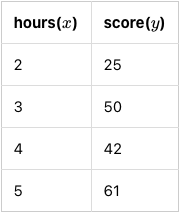

이를 좌표 평면에 그려보면 다음과 같습니다.

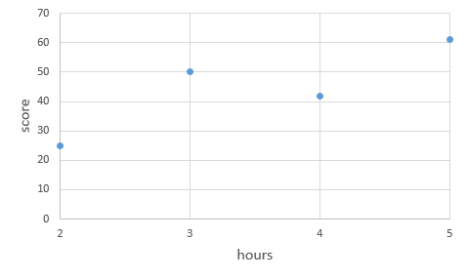


알고있는 데이터로부터 x와 y의 관계를 유추하고, 이 학생이 6시간, 7시간, 8시간을 공부하였을 때의 성적을 예측해보고 싶습니다. **x와 y의 관계를 유추하기 위해서 수학적으로 식을 세워보게 되는데 머신 러닝에서는 이러한 식을 가설(Hypothesis)** 이라고 합니다. 아래의 H(x)에서 H는 Hypothesis를 의미합니다.

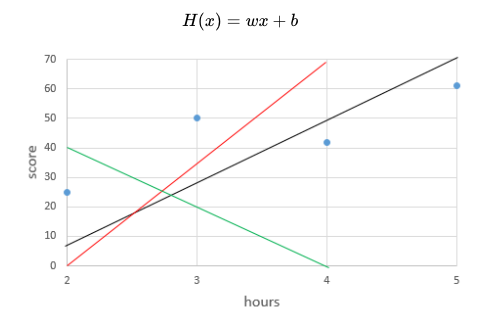

위의 그림은 w와 b의 값에 따라서 천차만별로 그려지는 직선의 모습을 보여줍니다. 중학교 수학 과정인 직선의 방정식을 알고있다면, 위의 가설에서 w는 직선의 기울기이고 b는 절편으로 직선을 표현함을 알 수 있습니다. 결국 선형 회귀는 주어진 데이터로부터 y와 x의 관계를 가장 잘 나타내는 직선을 그리는 일을 말합니다. 그리고 어떤 직선인지 결정하는 것은 w와 b의 값이므로 선형 회귀에서 해야할 일은 결국 적절한 w와 b를 찾아내는 일이 됩니다.

아직은 방법을 모르지만, 어떤 방법을 사용하여 적절한 w와 b의 값을 찾은 덕택에 y와 x의 관계를 가장 잘 나타내는 직선을 위의 좌표 평면 상에서 그렸다고 한 번 가정해보겠습니다. 이 직선을 x가 6일때, 7일때, 8일때에 대해서도 계속해서 직선을 그저 이어그린다면 이 학생이 6시간을 공부했을 때, 7시간을 공부했을 때, 8시간을 공부했을 때의 예상 점수를 말할 수 있게 됩니다. 그저 x가 각각 6일 때, 7일 때, 8일 때의 y값을 확인하면 되기 때문입니다.

## 3) 비용 함수(Cost function) : 평균 제곱 오차(MSE)

앞서 주어진 데이터에서 x와 y의 관계를 w와 b를 이용하여 식을 세우는 일을 가설이라고 언급했습니다. 그리고 이제 해야할 일은 문제에 대한 규칙을 가장 잘 표현하는 w와 b를 찾는 일입니다. 머신 러닝은 w와 b를 찾기 위해서 실제값과 가설로부터 얻은 예측값의 오차를 계산하는 식을 세우고, 이 식의 값을 최소화하는 최적의 w와 b를 찾아냅니다.

이때 실제값과 예측값에 대한 오차에 대한 식을 **목적 함수(Objective function) 또는 비용 함수(Cost function) 또는 손실 함수(Loss function)** 라고 합니다. **함수의 값을 최소화하거나, 최대화하거나 하는 목적을 가진 함수를 목적 함수(Objective function)**라고 합니다. 그리고 **값을 최소화하려고 하면 이를 비용 함수(Cost function) 또는 손실 함수(Loss function)**라고 합니다. 이 세 가지는 엄밀히는 같은 의미는 아니지만, 이 책에서는 목적 함수, 비용 함수, 손실 함수란 용어를 같은 의미로 혼용해서 사용합니다.

비용 함수는 단순히 실제값과 예측값에 대한 오차를 표현하면 되는 것이 아니라, 예측값의 오차를 줄이는 일에 최적화 된 식이어야 합니다. 앞으로 배울 러닝, 딥 러닝에는 다양한 문제들이 있고, 각 문제들에는 적합한 비용 함수들이 있습니다. 회귀 문제의 경우에는 주로 **평균 제곱 오차(Mean Squared Error, MSE)**가 사용됩니다.



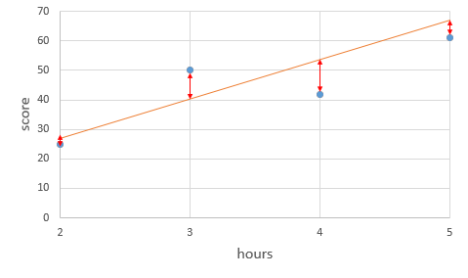

위의 그래프에 임의의 w의 값 13과 임의의 b의 값 1을 가진 직선을 그렸습니다. 임의로 그린 직선으로 정답이 아닙니다. 이제 이 직선으로부터 서서히 w와 b의 값을 바꾸면서 정답인 직선을 찾아내야 합니다.

사실 y와 x의 관계를 가장 잘 나타내는 직선을 그린다는 것은 위의 그림에서 모든 점들과 위치적으로 가장 가까운 직선을 그린다는 것과 같습니다. 이제 오차(error)를 정의하겠습니다. 오차는 주어진 데이터에서 각 x에서의 실제값 y와 위의 직선에서 예측하고 있는 H(x)값의 차이를 말합니다. 즉, 위의 그림에서 ↕는 각 점에서의 오차의 크기를 보여줍니다. 오차를 줄여가면서 w와 b의 값을 찾아내기 위해서는 전체 오차의 크기를 구해야 합니다.

오차의 크기를 측정하기 위한 가장 기본적인 방법은 각 오차를 모두 더하는 방법이 있습니다. 위의 y = 13x + 1직선이 예측한 예측값을 각각 실제값으로부터 오차를 계산하여 표를 만들어보면 아래와 같습니다.

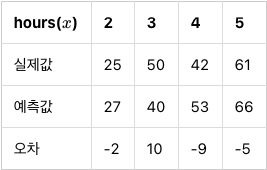

그런데, 수식적으로 단순히 '오차 = 실제값 - 예측값' 이라고 정의한 후에 모든 오차를 더하면 음수 오차도 있고, 양수 오차도 있으므로 오차의 절대적인 크기를 구할 수가 없습니다. 그래서 모든 오차를 제곱하여 더하는 방법을 사용합니다. 다시 말해 위의 그림에서의 모든 점과 직선 사이의 ↕ 거리를 제곱하고 모두 더합니다. 이를 수식으로 표현하면 아래와 같습니다. 단, 여기서 n은 갖고 있는 데이터의 개수를 의미합니다.

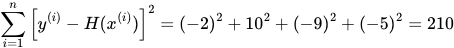

이때 데이터의 개수인 n으로 나누면, 오차의 제곱합에 대한 평균을 구할 수 있는데 이를 평균 제곱 오차(Mean Squered Error, MSE)라고 합니다. 수식은 아래와 같습니다.

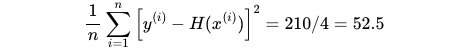

y = 13x + 1의 예측값과 실제값의 평균 제곱 오차의 값은 52.5입니다. 평균 제곱 오차의 값을 최소값으로 만드는 w와 b를 찾아내는 것이 정답인 직선을 찾아내는 일입니다. 평균 제곱 오차를 w와 b에 의한 비용 함수(Cost function)로 재정의해보면 다음과 같습니다.

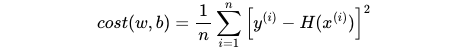

모든 점들과의 오차가 클 수록 평균 제곱 오차는 커지며, 오차가 작아질 수록 평균 제곱 오차는 작아집니다. 그러므로 이 평균 최곱 오차. 즉, cost(w, b) 를 최소가 되게 만드는 w와 b를 구하면 결과적으로 y와 x의 관계를 가장 잘 나타내는 직선을 그릴 수 있습니다.

image.png


## 4) 옵티마이저(Optimizer) : 경사하강법(Gradient Descent)

선형 회귀를 포함한 **수많은 머신 러닝, 딥 러닝의 학습은 결국 비용 함수를 최소화하는 매개 변수인 와 w을 b찾기 위한 작업을 수행합니다. 이때 사용되는 알고리즘을 옵티마이저(Optimizer) 또는 최적화 알고리즘이라**고 부릅니다.

그리고 이 옵티마이저를 통해 적절한 w와 b를 찾아내는 과정을 머신 러닝에서 훈련(training) 또는 학습(learning)이라고 부릅니다. 여기서는 가장 기본적인 옵티마이저 알고리즘인 경사 하강법(Gradient Descent)에 대해서 배웁니다.

경사 하강법을 이해하기 위해서 cost와 기울기 w와의 관계를 이해해보겠습니다. w는 머신 러닝 용어로는 가중치라고 불리지만, 직선의 방정식 관점에서 보면 직선의 기울기를 의미하고 있습니다. 아래의 그래프는 기울기 w가 지나치게 높거나, 낮을 때 어떻게 오차가 커지는 모습을 보여줍니다.




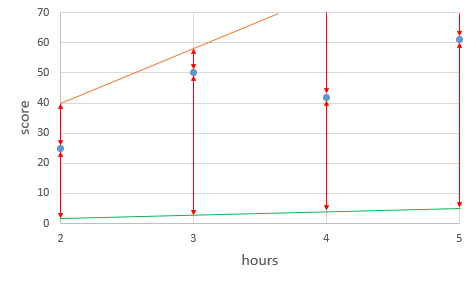

위의 그림에서 주황색선은 기울기 w가 20일 때, 초록색선은 기울기 w가 1일 때를 보여줍니다. 각각 y = 20x, y = x에 해당되는 직선입니다. ↕는 각 점에서의 실제값과 두 직선의 예측값과의 오차를 보여줍니다. 이는 앞서 예측에 사용했던 y = 13x + 1 직선보다 확연히 큰 오차값들입니다. 즉, 기울기가 지나치게 크면 실제값과 예측값의 오차가 커지고, 기울기가 지나치게 작아도 실제값과 예측값의 오차가 커집니다. 사실  b또한 마찬가지인데 b가 지나치게 크거나 작으면 오차가 커집니다.



설명의 편의를 위해 편향 b가 없이 단순히 가중치 w만을 사용한 y = wx 라는 가설 H(x)를 가지고, 경사 하강법을 수행한다고 해보겠습니다. 비용 함수의 값 cost(w)는 cost라고 줄여서 표현해보겠습니다. 이에 따라 w와 cost의 관계를 그래프로 표현하면 다음과 같습니다.

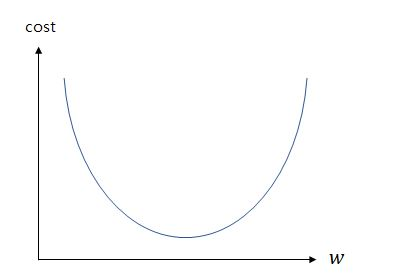

기울기 w가 무한대로 커지면 커질 수록 cost의 값 또한 무한대로 커지고, 반대로 기울기 w가 무한대로 작아져도 cost의 값은 무한대로 커집니다. 위의 그래프에서 cost가 가장 작을 때는 볼록한 부분의 맨 아래 부분입니다. 기계가 해야할 일은 cost가 가장 최소값을 가지게 하는 w를 찾는 일이므로, 볼록한 부분의 맨 아래 부분의 w의 값을 찾아야 합니다.

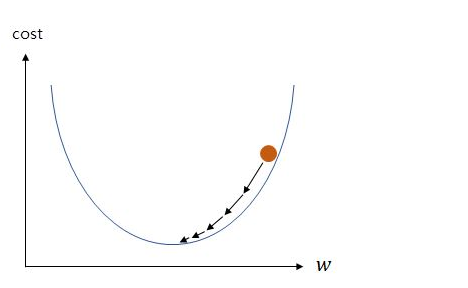

기계는 임의의 랜덤값 w값을 정한 뒤에, 맨 아래의 볼록한 부분을 향해 점차 의 w값을 수정해나갑니다. 위의 그림은 값이 점차 수정되는 과정을 보여줍니다. 그리고 이를 가능하게 하는 것이 경사 하강법(Gradient Descent)입니다. 이를 이해하기 위해서는 고등학교 수학 과정인 미분을 이해해야 합니다. 경사 하강법은 미분을 배우게 되면 가장 처음 배우게 되는 개념인 한 점에서의 순간 변화율 또는 다른 표현으로는 접선에서의 기울기의 개념을 사용합니다.

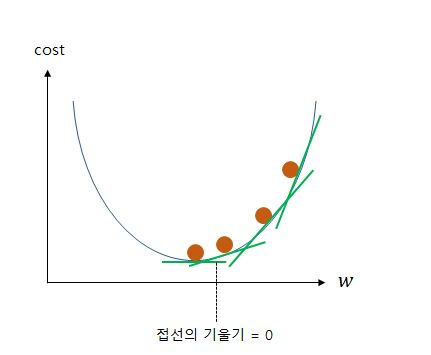

위의 그림에서 초록색 선은 w가 임의의 값을 가지게 되는 네 가지의 경우에 대해서, 그래프 상으로 접선의 기울기를 보여줍니다. 주목할 것은 맨 아래의 볼록한 부분으로 갈수록 접선의 기울기가 점차 작아진다는 점입니다. 그리고 맨 아래의 볼록한 부분에서는 결국 접선의 기울기가 0이 됩니다. 그래프 상으로는 초록색 화살표가 수평이 되는 지점입니다.

즉, cost가 최소화가 되는 지점은 접선의 기울기가 0이 되는 지점이며, 또한 미분값이 0이 되는 지점입니다. 경사 하강법의 아이디어는 비용 함수(Cost function)를 미분하여 현재 w에서의 접선의 기울기를 구하고, 접선의 기울기가 낮은 방향으로 w의 값을 변경하고 다시 미분하고 이 과정을 접선의 기울기가 0인 곳을 향해 w의 값을 변경하는 작업을 반복하는 것에 있습니다.



비용 함수(Cost function)는 아래와 같았습니다.

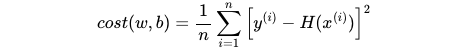

이제 비용(cost)를 최소화하는 w를 구하기 위해 w를 업데이트하는 식은 다음과 같습니다. 이를 접선의 기울기가 0이 될 때까지 반복합니다.

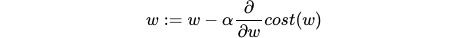

위의 식은 현재 w에서의 접선의 기울기와 a와 곱한 값을 현재 w에서 빼서 새로운 w의 값으로 한다는 것을 의미합니다. a는 여기서 학습률(learning rate)이라고 하는데, 우선 a는 생각하지 않고 현재 w에서 현재 w에서의 접선의 기울기를 빼는 행위가 어떤 의미가 있는지 알아보겠습니다.

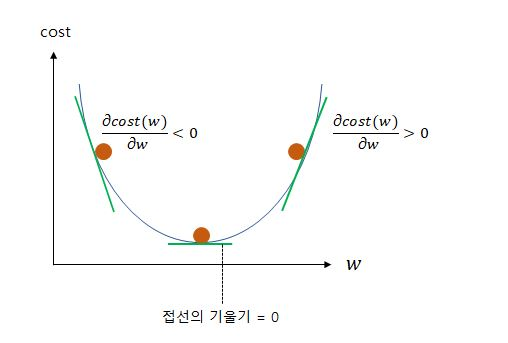

위의 그림은 접선의 기울기가 음수일 때, 0일때, 양수일 때를 보여줍니다. 접선의 기울기가 음수일 때의 수식은 아래와 같이 표현할 수 있습니다.



```
w := w - a(음수기울기)
```

기울기가 음수면 '음수를 빼는 것'은 곧 '해당 값을 양수로 바꾸고 더하는 것'과 같습니다. (가령, 어떤 수에서 -2를 뺀다는 것은 해당 숫자에 2를 더하는 것과 같습니다.) 결국 음수 기울기를 빼면 w의 값이 증가하게 되는데 이는 결과적으로 접선의 기울기가 0인 방향으로 w의 값이 조정됩니다. 만약, 접선의 기울기가 양수라면 위의 수식은 아래와 같이 표현할 수 있습니다.

```
w := w - a(양수기울기)
```

기울기가 양수면 w의 값이 감소하게 되는데 이는 결과적으로 기울기가 0인 방향으로 w의 값이 조정됩니다. **결국, 아래의 수식은 접선의 기울기가 음수거나, 양수일 때 모두 접선의 기울기가 0인 방향으로 w의 값을 조정합**니다.

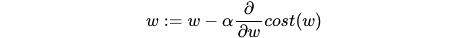



그렇다면 여기서 학습률(learning rate)이라고 말하는 a는 어떤 의미를 가질까요? 학습률 a은 w의 값을 변경할 때, 얼마나 크게 변경할지를 결정하며 0과 1사이의 값을 가지도록 합니다. 예를 들어서 0.01이 될 수 있겠습니다. 학습률은 w를 그래프의 한 점으로보고 접선의 기울기가 0일 때까지 경사를 따라 내려간다는 관점에서는 얼마나 큰 폭으로 이동할지를 결정합니다. 직관적으로 생각하기에 학습률 a의 값을 무작정 크게 하면 접선의 기울기가 최소값이 되는 w를 빠르게 찾을 수 있을 것같지만 그렇지 않습니다.

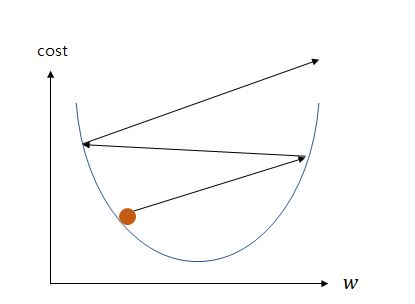

위의 그림은 학습률 a가 지나치게 높은 값을 가질 때, 접선의 기울기가 0이 되는 w를 찾아가는 것이 아니라 w의 값이 발산하는 상황을 보여줍니다. 반대로 학습률 a가 지나치게 낮은 값을 가지면 학습 속도가 느려지므로 적당한 a의 값을 찾아내는 것도 중요합니다. 지금까지는 b는 배제시키고 최적의 w를 찾아내는 것에만 초점을 맞추어 경사 하강법의 원리에 대해서 배웠는데, 실제 경사 하강법은 w와 b에 대해서 동시에 경사 하강법을 수행하면서 최적의 와 의 값을 찾아갑니다.

정리하자면 가설, 비용 함수, 옵티마이저는 머신 러닝 분야에서 사용되는 포괄적 개념입니다. 풀고자하는 각 문제에 따라 가설, 비용 함수, 옵티마이저는 전부 다를 수 있으며 선형 회귀에 가장 적합한 비용 함수와 옵티마이저가 알려져있는데 이번 챕터에서 언급된 MSE와 경사 하강법이 각각 이에 해당됩니다.

# 4. 자동 미분과 선형 회귀 실습

선형 회귀를 텐서플로우와 케라스를 통해 구현해봅시다.

## 1) 자동 미분

In [1]:
import tensorflow as tf

tape_gradient()는 자동 미분 기능을 수행합니다. 임의로 2w^2 + 5라는 식을 세워보고, w에 대해 미분해보겠습니다.



In [2]:
w = tf.Variable(2.)

def f(w):
  y = w**2
  z = 2*y + 5
  return z

gradients를 출력하면 w에 대해 미분한 값이 저장된 것을 확인할 수 있습니다.



In [3]:
with tf.GradientTape() as tape:
  z = f(w)

gradients = tape.gradient(z, [w])
print(gradients)

[<tf.Tensor: shape=(), dtype=float32, numpy=8.0>]


이 자동 미분 기능을 사용하여 선형 회귀를 구현해봅시다.



## 2) 자동 미분을 이용한 선형 회귀 구현

우선 가중치 변수 w와 b를 선언합니다. 학습될 값이므로 임의의 값인 4와 1로 초기화하였습니다.



In [4]:
# 학습될 가중치 변수를 선언
w = tf.Variable(4.0)
b = tf.Variable(1.0)

가설을 함수로서 정의합니다.

In [5]:
@tf.function
def hypothesis(x):
  return w * x + b

현재의 가설에서 w와 b는 각각 4와 1이므로 임의의 입력값을 넣었을 때의 결과는 다음과 같습니다.



In [6]:
x_test = [3.5, 5, 5.5, 6]
print(hypothesis(x_test).numpy())

[15. 21. 23. 25.]


다음과 같이 평균 제곱 오차를 손실 함수로서 정의합니다.



In [7]:
@tf.function
def mse_loss(y_pred, y):
  # 두 개의 차이값을 제곱을 해서 평균을 취한다.
  return tf.reduce_mean(tf.square(y_pred - y))

여기서 사용할 데이터는 x와 y가 약 10배의 차이를 가지는 데이터입니다.



In [8]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

옵티마이저는 경사 하강법을 사용하되, 학습률(learning rate)는 0.01을 사용합니다.

In [9]:
optimizer = tf.optimizers.SGD(0.01)

약 300번에 걸쳐서 경사 하강법을 수행하겠습니다.



In [10]:
for i in range(301):
  with tf.GradientTape() as tape:
    # 현재 파라미터에 기반한 입력 x에 대한 예측값을 y_pred
    y_pred = hypothesis(x)

    # 평균 제곱 오차를 계산
    cost = mse_loss(y_pred, y)

  # 손실 함수에 대한 파라미터의 미분값 계산
  gradients = tape.gradient(cost, [w, b])

  # 파라미터 업데이트
  optimizer.apply_gradients(zip(gradients, [w, b]))

  if i % 10 == 0:
    print('epoch : {:3} | w의 값 : {:5.4f} | b의 값 : {:5.4} | cost : {:5.6f}'.format(i, w.numpy(), b.numpy(), cost))

epoch :   0 | w의 값 : 8.2133 | b의 값 : 1.664 | cost : 1402.555542
epoch :  10 | w의 값 : 10.4971 | b의 값 : 1.977 | cost : 1.351182
epoch :  20 | w의 값 : 10.5047 | b의 값 :  1.93 | cost : 1.328163
epoch :  30 | w의 값 : 10.5119 | b의 값 : 1.884 | cost : 1.306966
epoch :  40 | w의 값 : 10.5188 | b의 값 : 1.841 | cost : 1.287436
epoch :  50 | w의 값 : 10.5254 | b의 값 : 1.799 | cost : 1.269459
epoch :  60 | w의 값 : 10.5318 | b의 값 : 1.759 | cost : 1.252897
epoch :  70 | w의 값 : 10.5379 | b의 값 : 1.721 | cost : 1.237644
epoch :  80 | w의 값 : 10.5438 | b의 값 : 1.684 | cost : 1.223597
epoch :  90 | w의 값 : 10.5494 | b의 값 : 1.648 | cost : 1.210658
epoch : 100 | w의 값 : 10.5548 | b의 값 : 1.614 | cost : 1.198740
epoch : 110 | w의 값 : 10.5600 | b의 값 : 1.582 | cost : 1.187767
epoch : 120 | w의 값 : 10.5650 | b의 값 :  1.55 | cost : 1.177665
epoch : 130 | w의 값 : 10.5697 | b의 값 :  1.52 | cost : 1.168354
epoch : 140 | w의 값 : 10.5743 | b의 값 : 1.492 | cost : 1.159782
epoch : 150 | w의 값 : 10.5787 | b의 값 : 1.464 | cost : 1.151890
epoch 

w와 b값이 계속 업데이트 됨에 따라서 cost가 지속적으로 줄어드는 것을 확인할 수 있습니다. 학습된 w와 b의 값에 대해서 임의 입력을 넣었을 경우의 예측값을 확인해봅시다.



In [11]:
x_test = [3.5, 5, 5.5, 6]
print(hypothesis(x_test).numpy())

[38.35479  54.295143 59.608593 64.92204 ]


모델을 구현하는 방법은 한 가지가 아닙니다. 텐서플로우의 경우, 케라스라는 고수준의 API를 사용하면 모델을 이보다 좀 더 쉽게 구현할 수 있습니다. 이번에는 선형 회귀 모델을 케라스로 구현해봅시다.



## 3) 케라스로 구현하는 선형 회귀

케라스에 대해서는 뒤의 딥 러닝 챕터에서 더 자세히 배우겠지만, 간단하게 케라스를 이용해서 선형 회귀를 구현해봅시다. 케라스로 모델을 만드는 기본적인 형식은 다음과 같습니다. Sequential로 model이라는 이름의 모델을 만들고, 그리고 add를 통해 입력과 출력 벡터의 차원과 같은 필요한 정보들을 추가해갑니다.



아래의 예시 코드를 봅시다. 첫번째 인자인 1은 출력의 차원을 정의합니다. 일반적으로 output_dim으로 표현되는 인자입니다. 두번째 인자인 input_dim은 입력의 차원을 정의하는데 이번 실습과 같이 1개의 실수 x를 가지고 하는 1개의 실수 y를 예측하는 단순 선형 회귀를 구현하는 경우에는 각각 1의 값을 가집니다.



```
# 예시 코드. 실행불가.
model = Sequential()
model.add(keras.layers.Dense(1, input_dim=1))
```



실습을 진행해봅시다. 아래의 코드는 간단하지만, 지금까지 배운 것들이 집대성 된 코드입니다. 우선 공부한 x시간을 , 각 공부한 시간에 따른 성적을 y라고 해봅시다. activation은 어떤 함수를 사용할 것인지를 의미하는데 선형 회귀를 사용할 경우에는 linear라고 기재합니다.

옵티마이저로 기본 경사 하강법을 사용하고 싶다면, sgd라고 기재합니다. 학습률은 0.01로 정하였습니다. 손실 함수로는 평균 제곱 오차를 사용합니다. 그리고 전체 데이터에 대한 훈련 횟수는 300으로 합니다.


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

x = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

model = Sequential()

# 출력 y의 차원은 1. 입력 x의 차원(input_dim)은 1
# 선형 회귀이므로 activation은 'linear'
model.add(Dense(1, input_dim=1, activation='linear'))

# sgd는 경사 하강법을 의미. 학습률(learning rate, lr)은 0.01.
sgd = optimizers.SGD(lr= 0.01)

# 손실 함수(Loss function)은 평균제곱오차 mse를 사용합니다.
model.compile(optimizer=sgd, loss='mse', metrics=['mse'])

# 주어진 x와 y 데이터에 대해서 오차를 최소화하는 작업을 300번 시도합니다.
model.fit(x, y, epochs=300)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/300
1/1 [==============================] - 1s 1s/step - loss: 4764.0371 - mse: 4764.0371
Epoch 2/300
1/1 [==============================] - 0s 11ms/step - loss: 587.3281 - mse: 587.3281
Epoch 3/300
1/1 [==============================] - 0s 10ms/step - loss: 73.4135 - mse: 73.4135
Epoch 4/300
1/1 [==============================] - 0s 29ms/step - loss: 10.1784 - mse: 10.1784
Epoch 5/300
1/1 [==============================] - 0s 28ms/step - loss: 2.3961 - mse: 2.3961
Epoch 6/300
1/1 [==============================] - 0s 20ms/step - loss: 1.4368 - mse: 1.4368
Epoch 7/300
1/1 [==============================] - 0s 19ms/step - loss: 1.3170 - mse: 1.3170
Epoch 8/300
1/1 [==============================] - 0s 16ms/step - loss: 1.3005 - mse: 1.3005
Epoch 9/300
1/1 [==============================] - 0s 30ms/step - loss: 1.2968 - mse: 1.2968
Epoch 10/300
1/1 [==============================] - 0s 36ms/step - loss: 1.2946 - mse: 1.2946
Epoch 11/300
1/1 [==============================] - 0s 13

학습이 끝났습니다. 최종적으로 선택된 오차를 최소화하는 직선을 그래프로 그려보겠습니다.



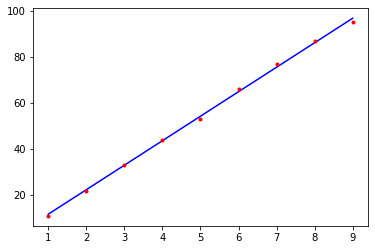

In [13]:
plt.plot(x, model.predict(x), 'b', x, y, 'r.')

위의 그래프에서 각 점은 우리가 실제 주었던 실제값에 해당되며, 직선은 실제값으로부터 오차를 최소화하는 w와 b의 값을 가지는 직선입니다. 이 직선을 통해 9시간 30분을 공부하였을 때의 시험 성적을 예측하게 해봅시다.

**model.predict()은 학습이 완료된 모델이 입력된 데이터에 대해서 어떤 값을 예측하는지**를 보여줍니다.

In [14]:
print(model.predict([9.5]))

[[102.13474]]


9시간 30분을 공부하면 약 102.1점을 얻는다고 예측하고 있습니다.



# 5. 로지스틱 회귀(Logistic Regression)

일상 속 풀고자하는 많은 문제 중에서는 두 개의 선택지 중에서 정답을 고르는 문제가 많습니다. 예를 들어 시험을 봤는데 이 시험 점수가 합격인지 불합격인지가 궁금할 수도 있고, 어떤 메일을 받았을 때 이게 정상 메일인지 스팸 메일인지를 분류하는 문제도 그렇습니다. 이렇게 둘 중 하나를 결정하는 문제를 이진 분류(Binary Classification)라고 합니다. 그리고 이런 문제를 풀기 위한 대표적인 알고리즘으로 로지스틱 회귀(Logistic Regression)가 있습니다.



## 1) 이진 분류(Binary Classification)

앞서 선형 회귀를 설명하며 공부 시간과 성적 간의 관계를 직선의 방정식으로 표현한다는 가설 하에, 주어진 데이터로부터 가중치 w와 편향 b를 찾아 데이터를 가장 잘 표현하는 직선을 찾았습니다. 그런데 이번에 배울 둘 중 하나의 선택지 중에서 정답을 고르는 이진 분류 문제는 직선으로 표현하는 것이 적절하지 않습니다.

학생들이 시험 성적에 따라서 합격, 불합격이 기재된 데이터가 있다고 가정해봅시다. 시험 성적이 x라면, 합불 결과는 y입니다. 이 데이터로부터 특정 점수를 얻었을 때의 합격, 불합격 여부를 판정하는 모델을 만들고자 합시다.

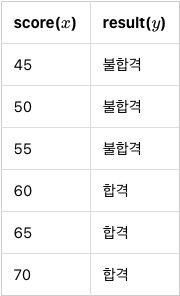

위 데이터에서 합격을 1, 불합격을 0이라고 하였을 때 그래프를 그려보면 아래와 같습니다.

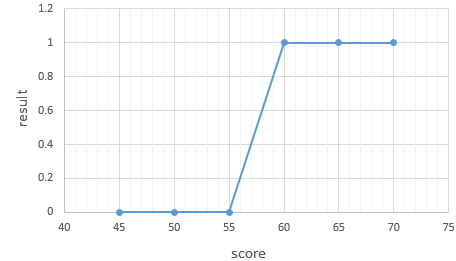

이러한 점들을 표현하는 그래프는 알파벳의 S자 형태로 표현됩니다. 이러한 x와 y의 관계를 표현하기 위해서는 직선을 표현하는 함수가 아니라 S자 형태로 표현할 수 있는 함수가 필요합니다. 직선을 사용할 경우 보통 분류 작업이 제대로 동작하지 않습니다.

이번 예제의 경우 실제값. 즉, 레이블에 해당하는 y가 0 또는 1이라는 두 가지 값만을 가지므로, 이 문제를 풀기 위해서 예측값은 0과 1사이의 값을 가지도록 합니다. 0과 1사이의 값을 확률로 해석하면 문제를 풀기가 훨씬 용이해집니다. 최종 예측값이 0.5보다 작으면 0으로 예측했다고 판단하고, 0.5보다 크면 1로 예측했다고 판단합니다. 만약 y = wx + b의 직선을 사용할 경우, y값이 음의 무한대부터 양의 무한대와 같은 큰 수들도 가질 수 있는데 이는 직선이 분류 문제에 적합하지 않은 두번째 이유입니다.

출력이 0과 1사이의 값을 가지면서 S자 형태로 그려지는 함수로 시그모이드 함수(Sigmoid function)가 있습니다.



## 2) 시그모이드 함수(Sigmoid function)

시그모이드 함수는 종종 σ로 축약해서 표현하기도 합니다. 로지스틱 회귀를 풀기 위한 가설을 세워봅시다.

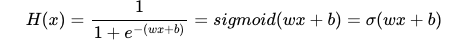

여기서 e(e=2.718281...)는 자연 상수라 불리는 숫자입니다. 여기서 구해야할 것은 여전히 주어진 데이터에 가장 적합한 가중치 w(weight)와 편향 b(bias)입니다. 인공 지능 알고리즘이 하는 것은 결국 주어진 데이터에 적합한 가중치 w와 b를 구하는 것입니다.



시그모이드 함수를 그래프로 시각화해봅시다.

In [15]:
import numpy as np
import matplotlib.pyplot as plt

아래의 그래프는 w는 1, b는 0임을 가정한 그래프입니다.



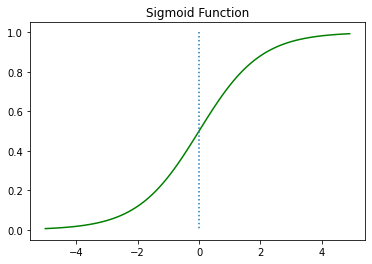

In [16]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y, 'g')
plt.plot([0,0], [1.0, 0.0], ':')
plt.title('Sigmoid Function')
plt.show()

위의 그래프에서 시그모이드 함수는 출력값을 0과 1사이의 값으로 조정하여 반환합니다. 마치 S자의 모양을 연상시킵니다. x가 0일 때 출력값은 0.5의 값을 가집니다. x가 증가하면 1에 수렴합니다. 가중치 w와 편향 b이 출력값에 어떤 영향을 미치는지 시각화를 통해 알아보겠습니다. 우선 w의 값을 변화시키고 이에 따른 그래프를 확인해봅시다.



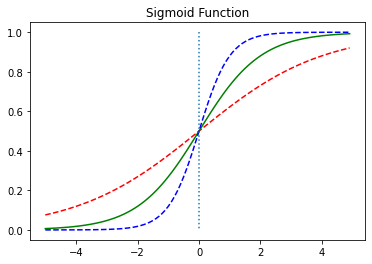

In [17]:
def sigomoid(x):
  return 1/(1+np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(0.5*x)
y2 = sigmoid(x)
y3 = sigmoid(2*x)

plt.plot(x, y1, 'r', linestyle='--') # w의 값이 0.5일 때
plt.plot(x, y2, 'g') # w의 값이 1일때
plt.plot(x, y3, 'b', linestyle='--') # w의 값이 2일때
plt.plot([0, 0], [1.0, 0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

위 그래프는 w의 값이 0.5일때 빨간색선, w의 값이 1일때는 초록색선, w의 값이 2일때 파란색선이 나오도록 하였습니다. w의 값에 따라 그래프의 경사도가 변합니다. 선형 회귀에서 직선을 표현할 때, 가중치 w는 직선의 기울기를 의미했지만 여기서는 그래프의 경사도를 결정합니다. w의 값이 커지면 경사가 커지고 w의 값이 작아지면 경사가 작아집니다.

의 값에 따라서 그래프가 어떻게 변하는지 보겠습니다.



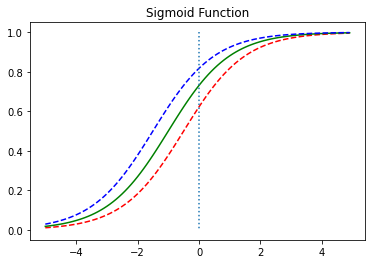

In [18]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x+0.5)
y2 = sigmoid(x+1)
y3 = sigmoid(x+1.5)

plt.plot(x, y1, 'r', linestyle='--') # x + 0.5
plt.plot(x, y2, 'g') # x + 1
plt.plot(x, y3, 'b', linestyle='--') # x + 1.5
plt.plot([0, 0], [1.0, 0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

위 그래프는 b값에 따라서 그래프가 이동하는 것을 보여줍니다. 시그모이드 함수는 입력값이 커지면 1에 수렴하고, 입력값이 작아지면 0에 수렴합니다. 0부터의 1까지의 값을 가지는데 출력값이 0.5 이상이면 1(True), 0.5이하면 0(False)로 만들면 이진 분류 문제를 풀기 위해서 사용할 수 있습니다.



## 3) 비용 함수(Cost function)

로지스틱 회귀 또한 경사 하강법을 사용하여 가중치 w를 찾아내지만, 비용 함수로는 평균 제곱 오차를 사용하지 않습니다. 평균 제곱 오차를 로지스틱 회귀의 비용 함수로 사용했을 때는 좋지 않은 로컬 미니멈에 빠질 가능성이 지나치게 높아 문제 해결이 어렵습니다.

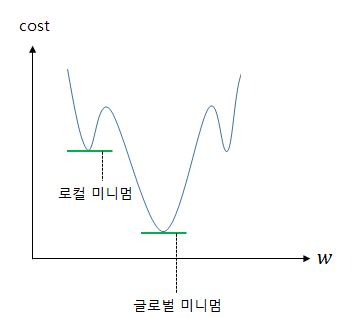

로지스틱 회귀에서 평균 제곱 오차를 비용 함수로 사용하면, 경사 하강법을 사용하였을때 찾고자 하는 최소값이 아닌 잘못된 최소값에 빠질 가능성이 매우 높습니다. 이를 **전체 함수에 걸쳐 최소값인 글로벌 미니멈(Global Minimum)** 이 아닌 **특정 구역에서의 최소값인 로컬 미니멈(Local Minimum)** 에 도달했다고 합니다. 로컬 미니멈에 지나치게 쉽게 빠지는 비용 함수는 cost가 가능한한 최소가 되는 가중치 w를 찾는다는 목적에는 좋지 않은 선택입니니다. 그리고 로지스틱 회귀에서의 평균 제곱 오차는 바로 그 좋지 않은 선택에 해당합니다.





로지스틱 회귀라는 문제에서 가중치 w를 최소로 만드는 적절한 새로운 비용 함수를 찾아야 합니다. 가중치를 최소화하는 아래의 어떤 함수를 목적 함수라고 합시다. J는 목적 함수(objective function)를 의미합니다.

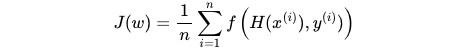

아직 완성된 식이 아닙니다. 위의 식에서 샘플 데이터의 개수가 n개이고, 어떤 함수 f가 실제값 
yi 와 예측값 H(xi)의 오차를 나타내는 함수라고 할 때, 여기서 새로운 함수 f를 어떻게 정의하느냐에 따라서 가중치를 최소화하는 적절한 목적 함수가 완성됩니다. 목적 함수는 전체 데이터에 대해서 어떤 함수 f의 값의 평균을 계산하고 있습니다. 적절한 가중치를 찾기 위해서 결과적으로 실제값과 예측값에 대한 오차를 줄여야 하므로 여기서 이 f는 비용 함수(cost function)라고 하겠습니다. 식을 다시 쓰면 아래와 같습니다.

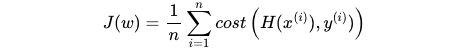

시그모이드 함수는 0과 1사이의 y값을 반환합니다. 이는 실제값이 0일 때 y값이 1에 가까워지면 오차가 커지며 실제값이 1일 때 y값이 0에 가까워지면 오차가 커짐을 의미합니다. 그리고 이를 반영할 수 있는 함수는 로그 함수를 통해 표현 가능합니다.

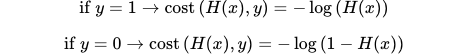

y의 실제값이 1일 때  -logH(x)그래프를 사용하고 y의 실제값이 0일 때  -log(1-H(x))그래프를 사용해야 합니다. 위의 두 식을 그래프 상으로 표현하면 아래와 같습니다.

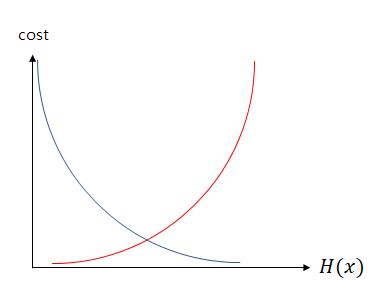

실제값 y가 1일 때의 그래프를 파란색 선으로 표현하였으며, 실제값 가 0일 때의 그래프를 빨간색 선으로 표현하였습니다. 위의 그래프를 간략히 설명하면, 실제값이 1일 때, 예측값인 H(x)의 값이 1이면 오차가 0이므로 당연히 cost는 0이 됩니다. 반면, 실제값이 1일 때, H(x)가 0으로 수렴하면 cost는 무한대로 발산합니다. 실제값이 0인 경우는 그 반대로 이해하면 됩니다. 이는 다음과 같이 하나의 식으로 표현할 수 있습니다.

image.png

자세히 보면 y와 (1-y)가 식 중간에 들어갔고, 두 개의 식을 -로 묶은 것 외에는 기존의 두 식이 들어가있는 것을 볼 수 있습니다. y가 0이면 ylogH(x)가 없어지고, y가 1이면 (1-y)log(1-H(x))가 없어지는데 이는 각각 y가 1일 때와 y가 0일 때의 앞서 본 식과 동일합니다.

결과적으로 로지스틱 회귀의 목적 함수는 아래와 같습니다.

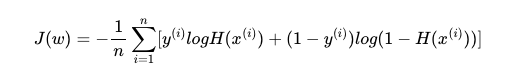

이때 **로지스틱 회귀에서 찾아낸 비용 함수를 크로스 엔트로피(Cross Entropy)함수**라고 합니다. 결론적으로 로지스틱 회귀는 비용 함수로 크로스 엔트로피 함수를 사용하며, 가중치를 찾기 위해서 크로스 엔트로피 함수의 평균을 취한 함수를 사용합니다. 크로스 엔트로피 함수는 소프트맥스 회귀의 비용 함수이기도 하므로 뒤에서 재언급합니다.

# 6. 로지스틱 회귀 실습

로지스틱 회귀를 케라스를 통해 구현해봅시다.



## 1) 케라스로 구현하는 로지스틱 회귀

독립 변수 데이터를 x, 숫자 10 이상인 경우에는 1, 미만인 경우에는 0을 부여한 레이블 데이터를 y라고 해봅시다.

이번 데이터는 앞서 배운 단순 선형 회귀때와 마찬가지로 1개의 실수 x로부터 1개의 실수인 y를 예측하는 맵핑 관계를 가지므로 Dense의 output_dim, input_dim 인자값으로 각각 1을 기재합니다. 시그모이드 함수를 사용할 것이므로 activation의 인자값으로는 sigmoid를 기재해줍니다.

옵티마이저로는 가장 기본적인 경사 하강법인 sgd를 사용하였습니다. 시그모이드 함수를 사용한 이진 분류 문제에 손실 함수로 크로스 엔트로피 함수를 사용할 경우 binary_crossentropy를 기재해주면 됩니다. 에포크는 200으로 합니다.



In [19]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

x = np.array([-50, -40, -30, -20, -10, -5, 0, 5, 10, 20, 30, 40, 50])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]) # 숫자 10부터 1

model = Sequential()
model.add(Dense(1, input_dim=1, activation='sigmoid'))

sgd = optimizers.SGD(lr=0.01)
model.compile(optimizer = sgd, loss='binary_crossentropy', metrics = ['binary_accuracy'])

model.fit(x, y, epochs=200)

Epoch 1/200


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 393ms/step - loss: 0.5062 - binary_accuracy: 0.9231
Epoch 2/200
1/1 [==============================] - 0s 13ms/step - loss: 0.5046 - binary_accuracy: 0.9231
Epoch 3/200
1/1 [==============================] - 0s 10ms/step - loss: 0.5030 - binary_accuracy: 0.9231
Epoch 4/200
1/1 [==============================] - 0s 9ms/step - loss: 0.5014 - binary_accuracy: 0.9231
Epoch 5/200
1/1 [==============================] - 0s 8ms/step - loss: 0.4998 - binary_accuracy: 0.9231
Epoch 6/200
1/1 [==============================] - 0s 10ms/step - loss: 0.4982 - binary_accuracy: 0.9231
Epoch 7/200
1/1 [==============================] - 0s 19ms/step - loss: 0.4966 - binary_accuracy: 0.9231
Epoch 8/200
1/1 [==============================] - 0s 9ms/step - loss: 0.4950 - binary_accuracy: 0.9231
Epoch 9/200
1/1 [==============================] - 0s 14ms/step - loss: 0.4934 - binary_accuracy: 0.9231
Epoch 10/200
1/1 [==============================] - 0s 6ms/step - los

총 200회에 걸쳐 전체 데이터에 대한 오차를 최소화하는 w와 b를 찾아내는 작업을 합니다. 저자의 경우 약 190회부터 정확도가 100%가 나오기 시작했습니다. 실제값과 오차를 최소화하도록 값이 변경된 w와 b의 값을 가진 모델을 이용하여 그래프를 그려보겠습니다.

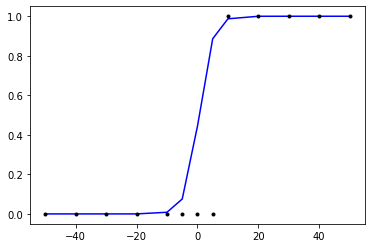

In [20]:
plt.plot(x, model.predict(x), 'b', x, y, 'k.')

x의 값이 5와 10사이의 어떤 값일때 y값이 0.5가 넘기 시작하는 것처럼 보입니다. 정확도가 100%가 나왔었기 때문에 적어도 x의 값이 5일때는 y값이 0.5보다 작고, x의 값이 10일 때는 y값이 0.5를 넘을 것입니다. 이제 x의 값이 5보다 작은 값일 때와 x의 값이 10보다 클 때에 대해서 y값을 출력해봅시다.

In [21]:
print(model.predict([1, 2, 3, 4, 4.5]))
print(model.predict([11, 21, 31, 41, 500]))

[[0.55732745]
 [0.6649934 ]
 [0.75785065]
 [0.83149165]
 [0.86103207]]
[[0.99170166]
 [0.99991184]
 [0.99999905]
 [1.        ]
 [1.        ]]


x의 값이 5보다 작을 때는 0.5보다 작은 값을, x의 값이 10보다 클 때는 0.5보다 큰 값을 출력하는 것을 볼 수 있습니다.



# 7. 다중 입력에 대한 실습

독립 변수 x가 2개 이상인 경우에 대해서 학습합니다. 비용 함수와 옵티마이저 등을 사용하는 방법은 동일합니다.



In [22]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

## 1) 다중 선형 회귀

딥 러닝 챕터로 들어가게되면 대부분의 입력들은 독립 변수가 2개 이상입니다. 모델을 직접 코딩하는 관점에서는 입력 벡터의 차원이 2이상이라고 할 수 있습니다. y를 결정하는데 있어 독립 변수가 3개인 선형 회귀를 풀어봅시다. 중간 고사, 기말 고사, 그리고 추가 점수를 어떤 공식을 통해 최종 점수를 계산한 데이터가 있습니다.

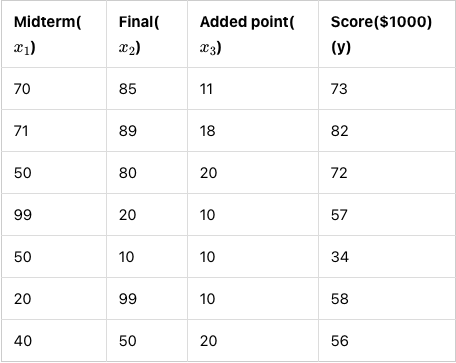

H(X) = w1x1 + w2x2 + w3x3 + b

3개의 특성을 가진 벡터 [x1, x2, x3]를 대문자 X로 표기합니다.

위 데이터의 샘플 중 상위 5개의 데이터만 훈련에 사용하고, 나머지 2개는 테스트에 사용해보겠습니다. 입력의 차원이 3으로 바뀌면서, input_dim의 인자값이 3으로 변경됩니다. 이는 입력 벡터의 X의 원소의 개수가 3개라고도 표현할 수 있고, 입력 벡터 X의 차원이 3임을 의미합니다.



In [23]:
# 중간 고사, 기말 고사, 가산점 점수
X = np.array([[70,85,11], [71,89,18], [50,80,20], [99,20,10], [50,10,10]]) 
y = np.array([73, 82 ,72, 57, 34]) # 최종 성적

model = Sequential()
model.add(Dense(1, input_dim=3, activation='linear'))

sgd = optimizers.SGD(lr=0.0001)
model.compile(optimizer=sgd, loss='mse', metrics=['mse'])
model.fit(X, y, epochs=2000)

Epoch 1/2000


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 299ms/step - loss: 426.6746 - mse: 426.6746
Epoch 2/2000
1/1 [==============================] - 0s 9ms/step - loss: 288.7951 - mse: 288.7951
Epoch 3/2000
1/1 [==============================] - 0s 17ms/step - loss: 197.6280 - mse: 197.6280
Epoch 4/2000
1/1 [==============================] - 0s 9ms/step - loss: 137.2452 - mse: 137.2452
Epoch 5/2000
1/1 [==============================] - 0s 9ms/step - loss: 97.1907 - mse: 97.1907
Epoch 6/2000
1/1 [==============================] - 0s 8ms/step - loss: 70.5826 - mse: 70.5826
Epoch 7/2000
1/1 [==============================] - 0s 10ms/step - loss: 52.8801 - mse: 52.8801
Epoch 8/2000
1/1 [==============================] - 0s 8ms/step - loss: 41.0824 - mse: 41.0824
Epoch 9/2000
1/1 [==============================] - 0s 7ms/step - loss: 33.2032 - mse: 33.2032
Epoch 10/2000
1/1 [==============================] - 0s 8ms/step - loss: 27.9262 - mse: 27.9262
Epoch 11/2000
1/1 [==============================]

모델의 학습이 끝났습니다. 학습된 모델에 입력 X에 대한 예측을 해봅시다.

In [24]:
print(model.predict(X))

[[72.93284 ]
 [81.9765  ]
 [72.09307 ]
 [57.117264]
 [33.802376]]


실제값에 근접한 예측을 하는 것을 볼 수 있습니다. 훈련할 때 사용하지 않았던 데이터를 가지고 예측 작업을 수행해보겠습니다.



In [25]:
X_test = np.array([[20,99,10], [40,50,20]])
print(model.predict(X_test))

[[57.90102 ]
 [56.056004]]


## 2) 다중 로지스틱 회귀

y를 결정하는데 있어 독립 변수 x가 2개인 로지스틱 회귀를 풀어봅시다. 꽃받침(Sepal)의 길이와 꽃잎(Petal)의 길이와 해당 꽃이 A인지 B인지가 적혀져 있는 데이터가 있을 때, 새로 조사한 꽃받침의 길이와 꽃잎의 길이로부터 무슨 꽃인지 예측할 수 있는 모델을 만들고자 한다면 이때 독립 변수 x는 2개가 됩니다.

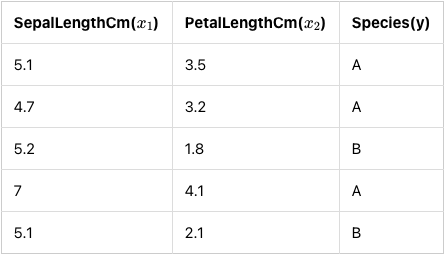

H(X) = sigmoid(w1x1 + w2x2 + b)

2개의 특성을 가진 벡터 [x1, x2]를 대문자 X로 표기합니다.



독립 변수가 2개인 좀 간단한 새로운 예를 들어서 이를 케라스로 구현해봅시다. 두 개의 입력 x1, x2의 합이 2이상이면 출력값 y가 1이 되고 두 개의 입력의 합이 2미만인 경우에만 출력값이 0이 되는 로직을 구현해봅시다.

앞서 실습한 로지스틱 회귀 코드와 거의 동일한데 달라진 점은 입력의 차원이 2로 바뀌면서 input_dim의 값이 2라는 점입니다. 이는 입력 벡터의 차원이 2임을 의미합니다.



In [26]:
X = np.array([[0, 0], [0, 1], [1, 0], [0, 2], [1, 1], [2, 0]])
y = np.array([0, 0, 0, 1, 1, 1])

model = Sequential()
model.add(Dense(1, input_dim=2, activation='sigmoid'))
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics = ['binary_accuracy']
)

model.fit(X, y, epochs=2000)

Epoch 1/2000
1/1 [==============================] - 1s 630ms/step - loss: 1.3465 - binary_accuracy: 0.5000
Epoch 2/2000
1/1 [==============================] - 0s 14ms/step - loss: 1.3424 - binary_accuracy: 0.3333
Epoch 3/2000
1/1 [==============================] - 0s 21ms/step - loss: 1.3383 - binary_accuracy: 0.3333
Epoch 4/2000
1/1 [==============================] - 0s 8ms/step - loss: 1.3343 - binary_accuracy: 0.3333
Epoch 5/2000
1/1 [==============================] - 0s 11ms/step - loss: 1.3303 - binary_accuracy: 0.3333
Epoch 6/2000
1/1 [==============================] - 0s 9ms/step - loss: 1.3263 - binary_accuracy: 0.3333
Epoch 7/2000
1/1 [==============================] - 0s 12ms/step - loss: 1.3223 - binary_accuracy: 0.3333
Epoch 8/2000
1/1 [==============================] - 0s 19ms/step - loss: 1.3184 - binary_accuracy: 0.3333
Epoch 9/2000
1/1 [==============================] - 0s 17ms/step - loss: 1.3144 - binary_accuracy: 0.3333
Epoch 10/2000
1/1 [============================

2000에포크 정도로 학습을 멈추고 각 입력에 대해서 출력값이 0.5보다 크고 작은지를 확인해보겠습니다.



In [27]:
print(model.predict(X))

[[0.25310925]
 [0.49345723]
 [0.49258146]
 [0.7368679 ]
 [0.73618793]
 [0.73550695]]


입력의 합이 2이상인 경우에는 전부 값이 0.5를 넘는 것을 볼 수 있습니다.



## 3) 인공 신경망 다이어그램

다중 로지스틱 회귀를 인공 신경망의 형태로 표현하면 다음과 같습니다. 아직 인공 신경망을 배우지 않았음에도 이렇게 다이어그램으로 표현해보는 이유는 로지스틱 회귀를 일종의 인공 신경망 구조로 해석해도 무방함을 보여주기 위함입니다.

image.png

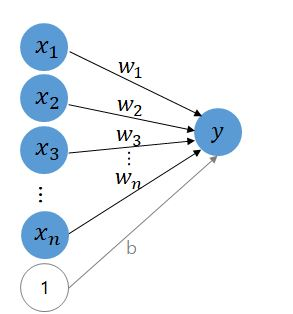

# 8. 벡터와 행렬 연산

앞서 독립 변수 x가 2개 이상인 선형 회귀와 로지스틱 회귀에 대해서 배웠습니다. 그런데 다음 실습인 소프트맥스 회귀에서는 종속 변수 y의 종류도 3개 이상이 되면서 더욱 복잡해집니다. 그리고 이러한 식들이 겹겹이 누적되면 인공 신경망의 개념이 됩니다.

케라스는 사용하기가 편리해서 이런 고민을 할 일이 상대적으로 적지만, Numpy나 텐서플로우의 로우-레벨(low-level)의 머신 러닝 개발을 하게되면 각 변수들의 연산을 벡터와 행렬 연산으로 이해할 수 있어야 합니다. 다시 말해 사용자가 데이터와 변수의 개수로부터 행렬의 크기, 더 나아 텐서의 크기를 산정할 수 있어야 합니다. 기본적인 벡터와 행렬 연산에 대해서 이해해보겠습니다.

## 1) 벡터와 행렬과 텐서

벡터는 크기와 방향을 가진 양입니다. 숫자가 나열된 형상이며 파이썬에서는 1차원 배열 또는 리스트로 표현합니다. 반면, 행렬은 행과 열을 가지는 2차원 형상을 가진 구조입니다. 파이썬에서는 2차원 배열로 표현합니다. 가로줄을 행(row)라고 하며, 세로줄을 열(column)이라고 합니다. 3차원부터는 주로 텐서라고 부릅니다. 텐서는 파이썬에서는 3차원 이상의 배열로 표현합니다.



## 2) 텐서(Tensor)

인공 신경망은 복잡한 모델 내의 연산을 주로 행렬 연산을 통해 해결합니다. 그런데 여기서 말하는 행렬 연산이란 단순히 2차원 배열을 통한 행렬 연산만을 의미하는 것이 아닙니다. 머신 러닝의 입, 출력이 복잡해지면 **3차원 텐서**에 대한 이해가 필수로 요구됩니다. 예를 들어 인공 신경망 모델 중 하나인 RNN에서는 3차원 텐서에 대한 개념 이해 없이는 이해하기가 쉽지 않습니다.

Numpy를 사용하여 텐서를 설명해보겠습니다.



In [28]:
import numpy as np

### (1) 0차원 텐서(스칼라)

**스칼라는 하나의 실수값으로 이루어진 데이터**를 말합니다. 이를 0차원 텐서라고 합니다. 차원을 영어로 Dimension이라고 하므로 0D 텐서라고도 합니다.



In [29]:
d = np.array(5)
print('텐서의 차원 :', d.ndim)
print('텐서의 크기(shape) :',  d.shape)

텐서의 차원 : 0
텐서의 크기(shape) : ()


Numpy의 ndim을 출력했을 때 나오는 값에 주목합시다. ndim을 출력했을 때 나오는 값을 우리는 축(axis)의 개수 또는 텐서의 차원이라고 부릅니다. 반드시 이 두 용어를 기억해둡시다.



### (2) 1차원 텐서(벡터)

숫자를 배열한 것을 벡터라고합니다. 벡터는 1차원 텐서입니다. 주의할 점은 벡터에서도 차원이라는 용어를 쓰는데, 벡터의 차원과 텐서의 차원은 다른 개념이라는 점입니다. 아래의 예제는 4차원 벡터이지만, 1차원 텐서입니다. 1D 텐서라고도 합니다.



In [30]:
d = np.array([1, 2, 3, 4])
print('텐서의 차원 :', d.ndim)
print('텐서의 크기(shaep) :', d.shape)

텐서의 차원 : 1
텐서의 크기(shaep) : (4,)


벡터의 차원과 텐서의 차원의 정의로 인해 혼동할 수 있는데 벡터에서의 차원은 하나의 축에 놓인 원소의 개수를 의미하는 것이고, 텐서에서의 차원은 축의 개수를 의미합니다.



### (3) 2차원 텐서(행렬)

행과 열이 존재하는 벡터의 배열. 즉, **행렬(matrix)을 2차원 텐서**라고 합니다. 2D 텐서라고도 합니다.



In [31]:
# 3행 4열의 행렬
d = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
print('텐서의 차원 :', d.ndim)
print('텐서의 크기(shape) :', d.shape)

텐서의 차원 : 2
텐서의 크기(shape) : (3, 4)


텐서의 크기(shape)에 대해서도 정리합시다. **텐서의 크기란, 각 축을 따라서 얼마나 많은 차원이 있는지를 나타낸 값**입니다. 텐서의 크기를 바로 머릿속으로 떠올릴 수 있으면 모델 설계 시에 유용합니다. 처음에는 어려울 수도 있는데, 순차적으로 확장해나가며 생각하는 것도 방법입니다. 위의 경우 3개의 커다란 데이터가 있는데 그 각각의 커다란 데이터는 작은 데이터 4개로 이루어졌다고 생각할 수 있습니다.



### (4) 3차원 텐서(다차원 배열)

행렬 또는 2차원 텐서를 단위로 한 번 더 배열하면 3차원 텐서라고 부릅니다. 3D 텐서라고도 합니다. 사실 위에서 언급한 0차원 ~ 2차원 텐서는 각각 스칼라, 벡터, 행렬이라고 해도 무방하므로 3차원 이상의 텐서부터 본격적으로 텐서라고 부릅니다. 데이터 사이언스 분야 한정으로 주로 3차원 이상의 배열을 텐서라고 부른다고 이해해도 좋습니다. 3D 텐서는 적어도 여기서는 3차원 배열로 이해하면 되겠습니다. 이 3차원 텐서의 구조를 이해하지 않으면, 복잡한 인공 신경망의 입, 출력값을 이해하는 것이 쉽지 않습니다. 개념 자체는 어렵지 않지만 반드시 알아야하는 개념입니다.



In [31]:
d = np.array([
            [[1, 2, 3, 4, 5], [6, 7, 8, 9, 10], [10, 11, 12, 13, 14]],
            [[15, 16, 17, 18, 19], [19, 20, 21, 22, 23], [23, 24, 25, 26, 27]]
            ])

print('텐서의 차원 :', d.ndim)
print('텐서의 크기(shape) :', d.shape)

자연어 처리에서 특히 자주 보게 되는 것이 이 3D 텐서입니다. 3D 텐서는 시퀀스 데이터(sequence data)를 표현할 때 자주 사용되기 때문입니다. 여기서 **시퀀스 데이터는 주로 단어의 시퀀스를 의미하며, 시퀀스는 주로 문장이나 문서, 뉴스 기사 등의 텍스트**가 될 수 있습니다. 이 경우 3D 텐서는 (samples, timesteps, word_dim)이 됩니다. 또는 일괄로 처리하기 위해 데이터를 묶는 단위인 배치의 개념에 대해서 뒤에서 배울텐데 (batch_size, timesteps, word_dim)이라고도 볼 수 있습니다.

samples 또는 batch_size는 샘플의 개수, timesteps는 시퀀스의 길이, word_dim은 단어를 표현하는 벡터의 차원을 의미합니다. 더 상세한 설명은 RNN 챕터에서 배우게 되겠지만 자연어 처리에서 왜 3D 텐서의 개념이 사용되는지 간단한 예를 들어봅시다. 다음과 같은 3개의 훈련 데이터가 있다고 해봅시다.

 - 문서1 : I like NLP
 - 문서2 : I like DL
 - 문서3 : DL is AI

이를 인공 신경망의 모델의 입력으로 사용하기 위해서는 각 단어를 벡터화해야 합니다. 단어를 벡터화하는 방법으로는 원-핫 인코딩이나 워드 임베딩이라는 방법이 대표적입니다. 워드 임베딩은 아직 배우지 않았으므로 원-핫 인코딩으로 각 단어를 벡터화 해보겠습니다.

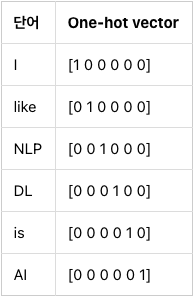

훈련 데이터의 단어들을 모두 원-핫 벡터로 바꿔서 인공 신경망의 입력으로 한 꺼번에 사용한다고 하면 다음과 같습니다. 이렇게 **훈련 데이터를 다수 묶어 입력으로 사용하는 것을 딥 러닝에서는 배치(Batch)**라고 합니다.

[[[1, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0]],
[[1, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0]],
[[0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 1]]]

이는 (3, 3, 6)의 크기를 가지는 3D 텐서입니다.





### (5) 그 이상의 텐서

3차원 텐서를 배열로 합치면 4차원 텐서가 됩니다. 4차원 텐서를 배열로 합치면 5차원 텐서가 됩니다. 이렇게 텐서는 다차원 배열로서 계속해서 확장될 수 있습니다.

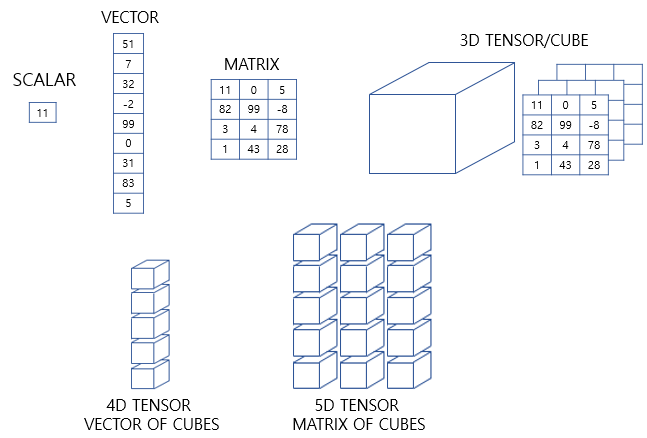

위의 그림은 각 텐서를 도형으로 시각화한 모습을 보여줍니다.





### (6) 케라스에서의 텐서

앞서 Numpy로 각 텐서의 ndim(차원)과 shape(크기)를 출력했었습니다. 예를 들어 위의 예제에서는 3차원 텐서의 크기(shape)는 (2, 3, 5)였습니다. 케라스에서는 신경망의 층에 입력의 크기(shape)를 인자로 줄 때 input_shape라는 인자를 사용합니다.

실제 예시는 뒤 챕터들에서 보겠지만 input_shape는 배치 크기를 제외하고 차원을 지정하는데, 예를 들어 input_shape(6, 5)라는 인자값을 사용하고 배치 크기를 32라고 지정한다면 이 텐서의 크기는 (?, 6, 5)을 의미합니다. 배치 크기는 지정해주기 전까지는 알 수 없기때문에 ?가 됩니다. 만약 배치 크기까지 지정해주고 싶다면 batch_input_shape=(8, 2, 10)와 같이 인자를 주면 이 텐서의 크기는 (8, 2, 10)을 의미합니다.

그 외에도 입력의 속성 수를 의미하는 input_dim, 시퀀스 데이터의 길이를 의미하는 input_length 등의 인자도 사용하는데, input_shape의 두 개의 인자는 (input_length, input_dim)입니다.



## 3) 벡터와 행렬의 연산

벡터와 행렬의 기본적인 연산에 대해서 알아보겠습니다.


In [32]:
import numpy as np

### (1) 벡터와 행렬의 덧셈과 뺄셈

같은 크기의 두 개의 벡터나 행렬은 덧셈과 뺄셈을 할 수 있습니다. 이 경우 같은 위치의 원소끼리 연산하면 됩니다. 이러한 연산을 요소별(element-wise) 연산이라고 합니다. 다음과 같이 A와 B라는 두 개의 벡터가 있다고 해봅시다.

이때 두 벡터 A와 B의 덧셈과 뺄셈은 아래와 같습니다.

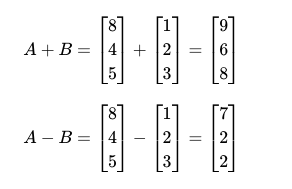

Numpy를 이용하여 이를 구현할 수 있습니다.




In [33]:
A = np.array([8, 4, 5])
B = np.array([1, 2, 3])
print('두 벡터의 합 :',A+B)
print('두 벡터의 차 :',A-B)

두 벡터의 합 : [9 6 8]
두 벡터의 차 : [7 2 2]


행렬도 마찬가지입니다. A와 B라는 두 개의 행렬이 있다고 하였을 때, 두 행렬 A와 B의 덧셈과 뺄셈은 아래와 같습니다.

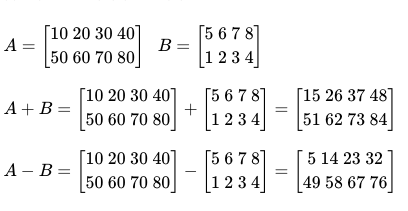

Numpy를 이용하여 이를 구현할 수 있습니다.



In [34]:
A = np.array([[10, 20, 30, 40], [50, 60, 70, 80]])
B = np.array([[5, 6, 7, 8],[1, 2, 3, 4]])
print('두 행렬의 합 :')
print(A + B)
print('두 행렬의 차 :')
print(A - B)


두 행렬의 합 :
[[15 26 37 48]
 [51 62 73 84]]
두 행렬의 차 :
[[ 5 14 23 32]
 [49 58 67 76]]


### (2) 벡터의 내적과 행렬의 곱셈

벡터의 점곱(dot product) 또는 내적(inner product)에 대해 알아봅시다. 벡터의 내적은 연산을 점(dot)으로 표현하여 a . b와 같이 표현하기도 합니다.

내적이 성립하기 위해서는 두 벡터의 차원이 같아야 하며, 두 벡터 중 앞의 벡터가 행벡터(가로 방향 벡터)이고 뒤의 벡터가 열벡터(세로 방향 벡터)여야 합니다. 아래는 두 벡터의 차원이 같고 곱셈의 대상이 각각 행벡터이고 열벡터일 때 내적이 이루어지는 모습을 보여줍니다. 벡터의 내적의 결과는 스칼라가 된다는 특징이 있습니다.

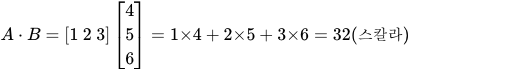

Numpy를 이용하여 이를 구현할 수 있습니다.



In [35]:
A = np.array([1, 2, 3])
B = np.array([4, 5, 6])

print('두 벡터의 내적 :', np.dot(A, B))

두 벡터의 내적 : 32


행렬의 곱셈을 이해하기 위해서는 벡터의 내적을 이해해야 합니다. 행렬의 곱셈은 왼쪽 행렬의 행벡터(가로 방향 벡터)와 오른쪽 행렬의 열벡터(세로 방향 벡터)의 내적(대응하는 원소들의 곱의 합)이 결과 행렬의 원소가 되는 것으로 이루어집니다. 다음과 같이 A와 B라는 두 개의 행렬이 있다고 하였을 때, 두 행렬 A와 B의 행렬의 곱셈은 아래와 같습니다.

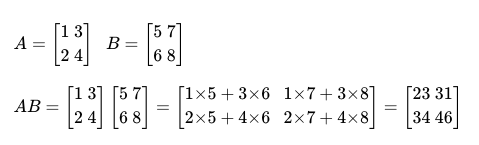

Numpy를 이용하여 이를 구현할 수 있습니다.



In [36]:
A = np.array([[1, 3],[2, 4]])
B = np.array([[5, 7],[6, 8]])
print('두 행렬의 행렬곱 :')
print(np.matmul(A, B))

두 행렬의 행렬곱 :
[[23 31]
 [34 46]]


행렬의 곱셈은 딥 러닝을 이해하기 위해 필수적인 개념이므로 반드시 숙지해야 합니다. 행렬 곱셈에서의 주요한 두 가지 조건 또한 반드시 기억해둡시다.

 - 두 행렬의 곱 A × B이 성립되기 위해서는 행렬 A의 열의 개수와 행렬 B의 행의 개수는 같아야 한다.
 - 두 행렬의 곱 A × B의 결과로 나온 행렬 AB의 크기는 A의 행의 개수와 B의 열의 개수를 가진다.
 
벡터와 행렬의 곱 또는 행렬과 벡터의 곱 또한 행렬의 곱셈과 동일한 원리로 이루어집니다.



## 4) 다중 선형 회귀 행렬 연산으로 이해하기

독립 변수가 2개 이상일 때, 1개의 종속 변수를 예측하는 문제를 행렬의 연산으로 표현한다면 어떻게 될까요? 다중 선형 회귀나 다중 로지스틱 회귀가 이러한 연산의 예인데, 여기서는 다중 선형 회귀를 통해 예를 들어보겠습니다. 다음은 독립 변수 x가 n개인 다중 선형 회귀 수식입니다.

image.png

이는 입력 벡터 [x1, ... , xn]와 가중치 벡터 [w1, ... , wn]의 내적으로 표현할 수 있습니다.




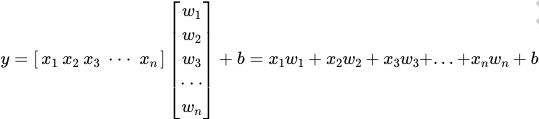

또는 가중치 벡터 [w1, ..., wn]와 입력 벡터[x1, ..., xn]의 내적으로 표현할 수도 있습니다.

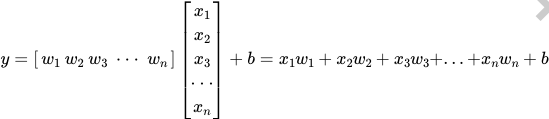

샘플의 개수가 많을 경우에는 행렬의 곱셈으로 표현이 가능합니다. 다음은 집의 크기, 방의 수, 층의 수, 집이 얼마나 오래되었는지와 집의 가격이 기록된 부동산 데이터라고 가정합시다. 해당 데이터를 학습하여 새로운 집의 정보가 들어왔을 때, 집의 가격을 예측하는 모델을 구현한다고 해봅시다.

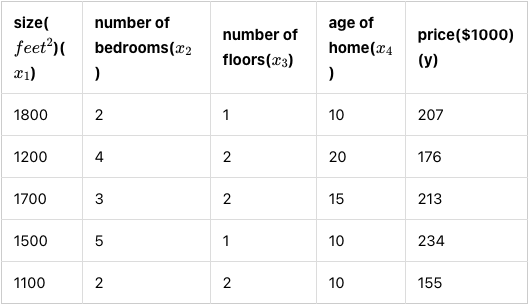

위 데이터에 대해서 입력 행렬 X와 가중치 벡터W 의 곱으로 표현하면 다음과 같습니다.

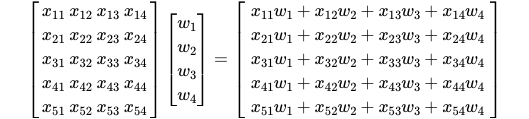

여기에 편향 벡터 B를 더 해주면 위 데이터에 대한 전체 가설 수식 H(X)를 표현할 수 있습니다.

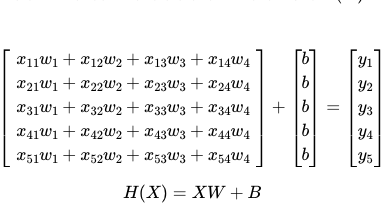

위의 수식에서 입력 행렬 는 5행 4열의 크기를 가집니다. 출력 벡터를 라고 하였을 때 는 5행 1열의 크기를 가집니다. 여기서 곱셈이 성립하기 위해서 가중치 벡터 의 크기는 4행 1열을 가져야함을 추론할 수 있습니다. 만약 가중치 벡터를 앞에 두고 입력 행렬을 뒤에 두고 행렬 연산을 한다면 이는 아래와 같습니다.

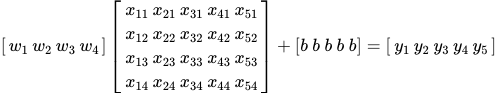

수학적 관례로 아래와 같이 수식으로 표현할 때는 주로 가중치 W가 입력 X의 앞에 오는 편입니다.



```
H(X) = WX + B
```

인공 신경망도 본질적으로 위와 같은 행렬 연산입니다.



## 5) 샘플(Sample)과 특성(Feature)

훈련 데이터의 입력 행렬을 X라고 하였을 때 샘플(Sample)과 특성(Feature)의 정의는 다음과 같습니다.

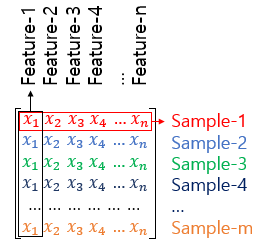

머신 러닝에서는 데이터를 셀 수 있는 단위로 구분할 때, 각각을 샘플이라고 부르며, 종속 변수 y를 예측하기 위한 각각의 독립 변수 x를 특성이라고 부릅니다.



## 6) 가중치와 편향 행렬의 크기 결정

앞서 언급하였던 행렬 곱셈의 두 가지 주요한 조건을 기억해둡시다.

 - 두 행렬의 곱 J × K이 성립되기 위해서는 행렬 J의 열의 개수와 행렬 K의 행의 개수는 같아야 한다.
 - 두 행렬의 곱 J × K의 결과로 나온 행렬 JK의 크기는 J의 행의 개수와 K의 열의 개수를 가진다.

이로부터 입력과 출력의 행렬의 크기로부터 가중치 행렬 W와 편향 행렬 B의 크기를 찾아낼 수 있습니다. 독립 변수 행렬을 X, 종속 변수 행렬을 Y라고 하였을 때, 이때 행렬 X를 입력 행렬(Input Matrix), Y를 출력 행렬(Output Matrix)이라고 합시다.



image.png

이제 입력 행렬의 크기와 출력 행렬의 크기로부터 W행렬과 B행렬의 크기를 추론해봅시다.



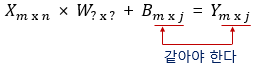

행렬의 덧셈에 해당되는 B행렬은 Y행렬의 크기에 영향을 주지 않습니다. 그러므로 B행렬의 크기는 Y행렬의 크기와 같습니다.

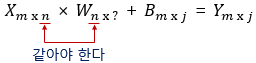

행렬의 곱셈이 성립되려면 행렬의 곱셈에서 앞에 있는 행렬의 열의 크기와 뒤에 있는 행렬의 행의 크기는 같아야 합니다. 그러므로 입력 행렬 X로부터 W행렬의 행의 크기가 결정됩니다.

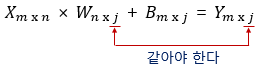

두 행렬의 곱의 결과로서 나온 행렬의 열의 크기는 행렬의 곱셈에서 뒤에 있는 행렬의 열의 크기와 동일합니다. 그러므로 출력 행렬 Y로부터 W행렬의 열의 크기가 결정됩니다. 입력 행렬과 출력 행렬의 크기로부터 가중치 행렬과 편향 행렬의 크기를 추정할 수 있다면, 딥 러닝 모델을 구현하였을 때 해당 모델에 존재하는 총 매개변수의 개수를 계산하기 쉽습니다. 어떤 딥 러닝 모델의 총 매개변수의 개수는 해당 모델에 존재하는 가중치 행렬과 편향 행렬의 모든 원소의 수이기 때문입니다.



---

https://www.tensorflow.org/guide/tensor?hl=ko

https://tensorflow.blog/%EC%BC%80%EB%9D%BC%EC%8A%A4-%EB%94%A5%EB%9F%AC%EB%8B%9D/2-2-%EC%8B%A0%EA%B2%BD%EB%A7%9D%EC%9D%84-%EC%9C%84%ED%95%9C-%EB%8D%B0%EC%9D%B4%ED%84%B0-%ED%91%9C%ED%98%84/



# 9. 소프트맥스 회귀(Softmax Regression)

앞서 로지스틱 회귀를 통해 2개의 선택지 중에서 1개를 고르는 이진 분류(Binary Classification)를 풀어봤습니다. 이번에는 **3개 이상의 선택지 중에서 1개를 고르는 다중 클래스 분류 문제를 위한 소프트맥스 회귀(Softmax Regression)**에 대해서 배웁니다.



## 1) 다중 클래스 분류(Multi-class Classification)

앞서 로지스틱 회귀에서 사용한 시그모이드 함수는 입력된 데이터에 대해서 0과 1사이의 값을 출력하여 해당 값이 둘 중 하나에 속할 확률로 해석할 수 있도록 만들어주었습니다. 예를 들어 0이 정상 메일, 1이 스팸 메일이라고 정의해놓는다면 시그모이드 함수의 0과 1사이의 출력값을 스팸 메일일 확률로 해석할 수 있었습니다. 확률값이 0.5를 넘으면 1에 가까우니 스팸 메일로 판단하면 되고, 그 반대라면 정상 메일로 판단하면 됩니다.

이진 분류가 두 개의 선택지 중 하나를 고르는 문제였다면, 세 개 이상의 선택지 중 하나를 고르는 문제를 다중 클래스 분류라고 합니다. 아래의 붓꽃 품종 예측 데이터는 꽃받침 길이, 꽃받침 넓이, 꽃잎 길이, 꽃잎 넓이로부터 setosa, versicolor, virginica라는 3개의 품종 중 어떤 품종인지를 예측하는 문제를 위한 데이터로 전형적인 다중 클래스 분류 문제를 위한 데이터입니다.

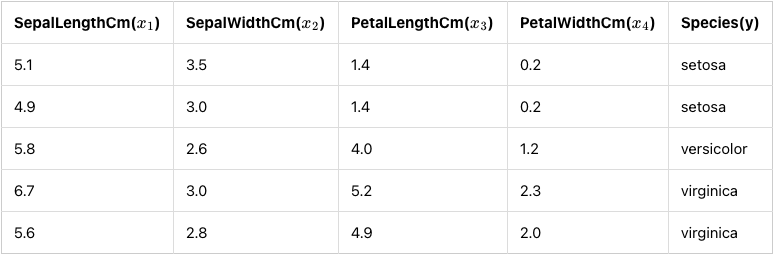

여기에 앞서 배운 시그모이드 함수를 사용해본다면 어떨까요? 어쩌면 입력된 샘플 데이터에 대해서 각 정답지에 대해서 시그모이드 함수를 적용해볼 수 있습니다. 만약 그렇게 한다면, setosa가 정답일 확률은 0.8, versicolor가 정답일 확률은 0.2, virginica가 정답일 확률은 0.4 등과 같은 출력을 얻게됩니다. 그런데 이 전체 확률의 합계가 1이 되도록 하여 전체 선택지에 걸친 확률로 바꿀 순 없을까요? 예를 들어 샘플 데이터가 입력으로 들어오면 모델이 setosa일 확률이 0.7, versicolor일 확률 0.05, virginica일 확률이 0.25과 같이 세 개의 확률의 총 합이 1인 예측값을 얻도록 하자는 것입니다. 그리고 이 경우 확률값이 가장 높은 setosa로 예측한 것으로 간주하고자 합니다. 이럴 때 사용할 수 있는 것이 소프트맥스 함수입니다.



## 2) 소프트맥스 함수(Sofrtmax function)

**소프트맥스 함수는 선택해야 하는 선택지의 총 개수를 k라고 할 때, k차원의 벡터를 입력받아 각 클래스에 대한 확률을 추정**합니다. 우선 수식에 대해 설명하고, 그 후에는 그림으로 이해해보겠습니다.

### (1) 소프트맥스 함수의 이해

k차원의 벡터에서 i번째 원소를 
zi, i번째 클래스가 정답일 확률을 
pi로 나타낸다고 하였을 때 소프트맥스 함수는 
pi를 다음과 같이 정의합니다.

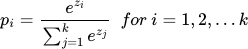

위에서 풀어야하는 문제에 소프트맥스 함수를 차근차근 적용해봅시다. 위에서 풀어야하는 문제의 경우 k=3이므로 3차원 벡터 z = [z1, z2, z3]
의 입력을 받으면 소프트맥스 함수는 아래와 같은 출력을 리턴합니다.



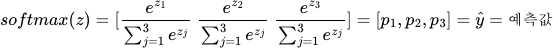

p1, p2, p3 각각은 1번 클래스가 정답일 확률, 2번 클래스가 정답일 확률, 3번 클래스가 정답일 확률을 나타내며 각각 0과 1사이의 값으로 총 합은 1이 됩니다. 여기서 분류하고자하는 3개의 클래스는 virginica, setosa, versicolor이므로 이는 결국 주어진 입력이 virginica일 확률, setosa일 확률, versicolor일 확률을 나타내는 값을 의미합니다. 여기서는 i가 1일 때는 virginica일 확률을 나타내고, 2일 때는 setosa일 확률, 3일때는 versicolor일 확률이라고 지정하였다고 합시다. 이 지정 순서는 문제를 풀고자 하는 사람의 무작위 선택입니다. 이에따라 식을 문제에 맞게 다시 쓰면 아래와 같습니다.

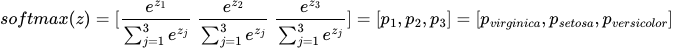

다소 복잡해보이지만 어려운 개념이 아닙니다. 분류하고자 하는 클래스가 k개일 때, k차원의 벡터를 입력받아서 모든 벡터 원소의 값을 0과 1사이의 값으로 값을 변경하여 다시 k차원의 벡터를 반환한다는 내용을 식으로 기재했습니다. 방금 배운 개념을 그림을 통해 다시 설명해보겠습니다.





### (2) 그림을 통한 이해

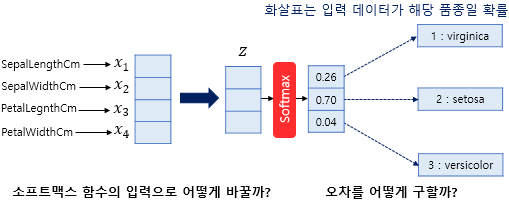

위의 그림에 점차 살을 붙여가는 식으로 설명합니다. 여기서는 샘플 데이터를 1개씩 입력으로 받아 처리한다고 가정해봅시다. 즉, 배치 크기가 1입니다.

위의 그림에는 두 가지 의문이 있습니다. 첫번째 질문은 소프트맥스 함수의 입력에 대한 의문입니다. 하나의 샘플 데이터는 4개의 독립 변수 x를 가지는데 이는 모델이 4차원 벡터를 입력으로 받음을 의미합니다. 그런데 소프트맥스의 함수의 입력으로 사용되는 벡터는 벡터의 차원이 분류하고자 하는 클래스의 개수가 되어야 하므로 어떤 가중치 연산을 통해 3차원 벡터로 변환되어야 합니다. 위의 그림에서는 소프트맥스 함수의 입력으로 사용되는 3차원 벡터를 z로 표현하였습니다.

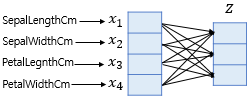

샘플 데이터 벡터를 소프트맥스 함수의 입력 벡터로 차원을 축소하는 방법은 간단합니다. 소프트맥스 함수의 입력 벡터 z의 차원수만큼 결과값이 나오도록 가중치 곱을 진행합니다. 위의 그림에서 화살표는 총 (4 × 3 = 12) 12개이며 전부 다른 가중치를 가지고, 학습 과정에서 점차적으로 오차를 최소화하는 가중치로 값이 변경됩니다.

두번째 질문은 오차 계산 방법에 대한 의문입니다. 소프트맥스 함수의 출력은 분류하고자하는 클래스의 개수만큼 차원을 가지는 벡터로 각 원소는 0과 1사이의 값을 가집니다. 이 각각은 특정 클래스가 정답일 확률을 나타냅니다. 여기서는 첫번째 원소인 
p1은 virginica가 정답일 확률, 두번째 원소인 
p2는 setosa가 정답일 확률, 세번째 원소인 
p3은 versicolor가 정답일 확률로 고려하고자 합니다. 그렇다면 이 예측값과 비교를 할 수 있는 실제값의 표현 방법이 있어야 합니다. 소프트맥스 회귀에서는 실제값을 원-핫 벡터로 표현합니다.

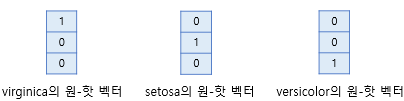
